In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("delivery_price.xlsx")

df

,№ Заказа,Статус,order_method,Название клиента,legal_entity,Название БЕ,Название базиса,Поставщик,Каталог,В наличии,...,Дата перехода в Cancel,Дата перехода в Shipped,Дата перехода подзаказа в актуаль,Плановая дата поставки в РЦ,Фактическая дата поставки в РЦ,Плановая дата поставки в базис,Сумма подзаказа без НДС,Доставка,Сумма подзаказа с доставкой без НД,Email менеджера
0,AIM71481-0084,6_В обработке у клиента,MP,АИМ,"АО ""БМЗ""","АО ""БМЗ""",БМЗ Склад №3,19 (info@zao-ri.ru),60,False,...,NaT,NaT,2024-03-21 11:24:18.225,2024-04-12 03:00:00.000,NaT,2024-04-25 14:00:00.000,2350.50,271.00,2621.50,{v.anshic@maksmart.ru}
1,AIM71481-0084,6_В обработке у клиента,MP,АИМ,"АО ""БМЗ""","АО ""БМЗ""",БМЗ Склад №3,304 (megavolt_2018@bk.ru),421,False,...,NaT,NaT,2024-03-21 11:20:33.872,2024-05-03 03:00:00.000,NaT,2024-05-16 14:00:00.000,2983.75,904.15,3887.90,{j.batyr@maksmart.ru}
2,AIM71479-0048,3_В плане,ERP,АИМ,"ООО ""ЕвроХим - УКК""",УКК_УКК Логистика,УКК Логистика Центр склад 1021,304 (megavolt_2018@bk.ru),421,False,...,NaT,NaT,2024-03-21 11:07:34.107,2024-05-03 03:00:00.000,NaT,2024-05-16 14:00:00.000,3960.24,904.16,4864.40,{j.batyr@maksmart.ru}
3,AIM0012-1086,3_В плане,ERP,АИМ,"АО ""НАК ""Азот""","АО ""НАК ""Азот""",ЕВРОХИМ_НАК_Азот_МП1,304 (megavolt_2018@bk.ru),421,False,...,NaT,NaT,2024-03-21 11:17:36.198,2024-04-19 03:00:00.000,NaT,2024-04-29 15:00:00.000,9614.20,706.65,10320.85,{j.batyr@maksmart.ru}
4,AIM0548-0106,3_В плане,ERP,АИМ,"ООО ""ЕвроХим-ВолгаКалий""",ЕХ-ВолгаКалий_Добыча,ЕХ-ВолгаКалий_Добыча_МП1,18 (tender@garwin.ru),143,False,...,NaT,NaT,2024-03-21 11:02:09.267,NaT,NaT,NaT,48671.70,0.00,48671.70,{v.anshic@maksmart.ru}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30338,PL0001-0005,NaN,ERP,"ПАО ""Полюс""",АО “Полюс Красноярск”,"АО ""Полюс Красноярск""",Еруда_ПЛ,36 (tmd2009@yandex.ru),25,False,...,NaT,NaT,2023-02-06 14:34:28.089,NaT,NaT,NaT,4940.00,0.00,4940.00,{v.anshic@maksmart.ru}
30339,PL0001-0005,7_Доставлено до клиента,ERP,"ПАО ""Полюс""",АО “Полюс Красноярск”,"АО ""Полюс Красноярск""",Еруда_ПЛ,49 (kam2-msk@instrument-fit.ru),59,True,...,NaT,2023-02-16 13:38:54.954,2023-04-29 01:22:51.919,2023-02-14 14:12:56.239,2023-02-22 15:36:13.305,2023-03-04 14:12:56.239,8273.32,941.67,9214.99,{v.anshic@maksmart.ru}
30340,PL0001-0003,0_Опаздывает клиенту,ERP,"ПАО ""Полюс""",АО “Полюс Красноярск”,"АО ""Полюс Красноярск""",Еруда_ПЛ,11 (tender.tdstk@mail.ru),17,False,...,NaT,NaT,2023-02-04 09:53:05.669,2023-02-27 20:00:00.000,NaT,2023-03-18 05:46:14.904,330146.92,0.00,330146.92,{v.anshic@maksmart.ru}
30341,PL0001-0003,0_Опаздывает клиенту,ERP,"ПАО ""Полюс""",АО “Полюс Красноярск”,"АО ""Полюс Красноярск""",Еруда_ПЛ,9 (zveno2001@mail.ru),16,False,...,NaT,NaT,2023-02-04 09:53:05.669,2023-02-17 12:19:00.000,NaT,2023-03-10 12:22:39.615,119871.03,2500.00,122371.03,{v.anshic@maksmart.ru}


       Меняем столбцы для удобства:

In [4]:
df = df[['№ Заказа', 'Статус', 'Название клиента', 'legal_entity', 'Название базиса', 'Поставщик', 'Каталог', 'В наличии', 
        'Сумма подзаказа без НДС', 'Доставка']]

df.columns = ['order', 'status', 'client_name', 'BE', 'basis', 'sup', 'cat', 'stock', 'price', 'delivery']
df['sup'] = df['sup'].str.extract('(\d+)')

df

,order,status,client_name,BE,basis,sup,cat,stock,price,delivery
0,AIM71481-0084,6_В обработке у клиента,АИМ,"АО ""БМЗ""",БМЗ Склад №3,19,60,False,2350.50,271.00
1,AIM71481-0084,6_В обработке у клиента,АИМ,"АО ""БМЗ""",БМЗ Склад №3,304,421,False,2983.75,904.15
2,AIM71479-0048,3_В плане,АИМ,"ООО ""ЕвроХим - УКК""",УКК Логистика Центр склад 1021,304,421,False,3960.24,904.16
3,AIM0012-1086,3_В плане,АИМ,"АО ""НАК ""Азот""",ЕВРОХИМ_НАК_Азот_МП1,304,421,False,9614.20,706.65
4,AIM0548-0106,3_В плане,АИМ,"ООО ""ЕвроХим-ВолгаКалий""",ЕХ-ВолгаКалий_Добыча_МП1,18,143,False,48671.70,0.00
...,...,...,...,...,...,...,...,...,...,...
30338,PL0001-0005,NaN,"ПАО ""Полюс""",АО “Полюс Красноярск”,Еруда_ПЛ,36,25,False,4940.00,0.00
30339,PL0001-0005,7_Доставлено до клиента,"ПАО ""Полюс""",АО “Полюс Красноярск”,Еруда_ПЛ,49,59,True,8273.32,941.67
30340,PL0001-0003,0_Опаздывает клиенту,"ПАО ""Полюс""",АО “Полюс Красноярск”,Еруда_ПЛ,11,17,False,330146.92,0.00
30341,PL0001-0003,0_Опаздывает клиенту,"ПАО ""Полюс""",АО “Полюс Красноярск”,Еруда_ПЛ,9,16,False,119871.03,2500.00


    Создадим столбцы full_price (цена с учетом доставки) и % (процент доставки от общей стоимости):

In [5]:
df['full_price'] = df['price'] + df['delivery']

df['%'] = df['delivery'] / df['full_price']

df['status'].fillna('Canceled', inplace=True)

    Рассмотрим статус Canceled в отдельности:

df['%'] = df['%'].round(1)

In [6]:
df.groupby('status')['%'].mean().reset_index().sort_values('%', ascending=False)

,status,%
0,0_Опаздывает клиенту,0.160649
4,4_Ожидает приёмки в базисе,0.133623
1,1_Опаздывает в РЦ,0.132793
3,3_В плане,0.122997
5,6_В обработке у клиента,0.101753
6,7_Доставлено до клиента,0.099848
7,Canceled,0.060999
2,2_Задержка согласования,0.052418


Процент доставки в отмененных подзаказов ниже обычного. Стоит убрать статус из рассмотрения

In [7]:
df = df[df['status'] != 'Canceled']

    Создадим датафрейм с заказами, сформированными из подзаказов и расчитаем дополнительные столбцы:

In [8]:
df_order = df.groupby(['order', 'BE'])[['price', 'delivery']].sum().reset_index()
df_order['full_price'] = df_order['price'] + df_order['delivery']
df_order['%'] = df_order['delivery'] / df_order['full_price']
df_order

,order,BE,price,delivery,full_price,%
0,AIM0006-0001,АО «СУЭК-Красноярск»,8840.00,2239.20,11079.20,0.202108
1,AIM0006-0002,АО «СУЭК-Красноярск»,1259.17,1433.33,2692.50,0.532342
2,AIM0006-0003,АО «СУЭК-Красноярск»,48818.00,0.00,48818.00,0.000000
3,AIM0006-0004,АО «СУЭК-Красноярск»,4630.11,0.00,4630.11,0.000000
4,AIM0006-0005,АО «СУЭК-Красноярск»,10118.93,0.00,10118.93,0.000000
...,...,...,...,...,...,...
9140,PL2852-0019,ООО «Управляющая компания Полюс»,219847.78,0.00,219847.78,0.000000
9141,PL2852-0022,ООО «Управляющая компания Полюс»,22662.70,0.00,22662.70,0.000000
9142,PL2852-0029,ООО «Управляющая компания Полюс»,98600.16,1666.32,100266.48,0.016619
9143,PL2852-0030,ООО «Управляющая компания Полюс»,4654.60,0.00,4654.60,0.000000


## Анализ подзаказов:    
    
    Необходимо взглянуть на топ БЕ по % с полным датафреймом и с датафреймом, где delivery != 0:

In [9]:
be1 = df.groupby('BE')['%'].mean().reset_index().sort_values('%')
be2 = df[df['delivery'] != 0].groupby('BE')['%'].mean().reset_index().sort_values('%')

# Объединение результатов с помощью merge по столбцу 'BE'
result = pd.merge(be1, be2, on='BE', suffixes=('_all', '_delivery')).sort_values('%_delivery', ascending=False)
result

,BE,%_all,%_delivery
22,АО «Полюс Магадан»,0.221234,0.301941
21,АО «Полюс Алдан»,0.200487,0.300994
19,АО «Полюс Логистика»,0.153997,0.280887
20,"ПАО ""НЛМК""",0.194436,0.277290
6,АО «СУЭК-Красноярск»,0.084954,0.258612
18,"Филиал ООО ""НевРСС"" в г. Белореченск",0.152775,0.233183
5,ООО «ЕСК-СУЭК»,0.080651,0.220830
12,АО “Полюс Красноярск”,0.107233,0.220409
0,ООО «Управляющая компания Полюс»,0.060408,0.205388
16,"ООО ""НовомосковскРСС""",0.122582,0.205164


Заметно, что Магадан, Алдан - в топах, но сильного отрыва от последующих мест нет.

    Посмотрим распределения топов по %:

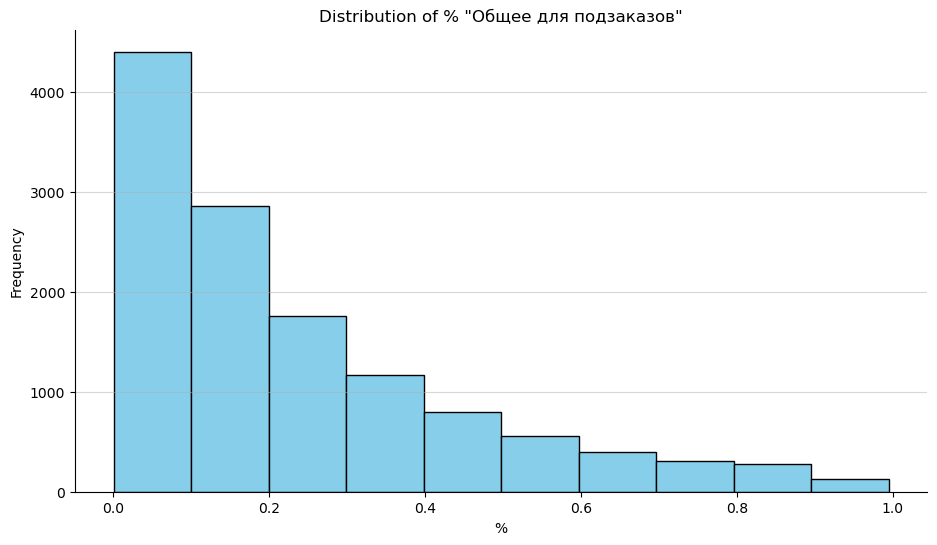

In [10]:
df_delivery = df[df['delivery'] != 0]
plt.figure(figsize=(11, 6))
plt.hist(df_delivery['%'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of % "Общее для подзаказов"')
plt.xlabel('%')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

    Топы БЕ:

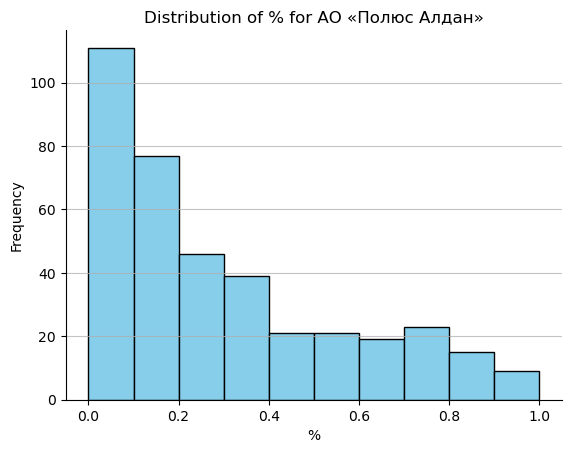

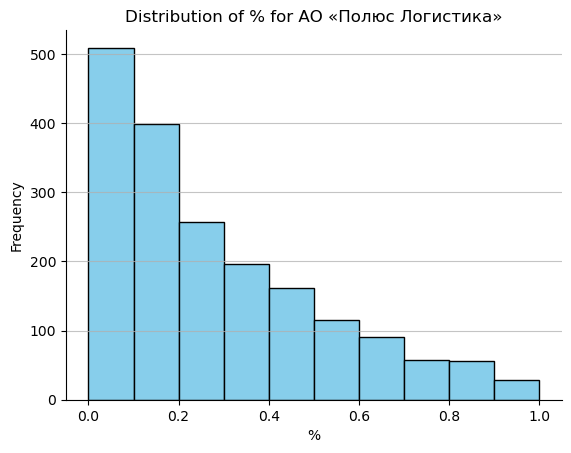

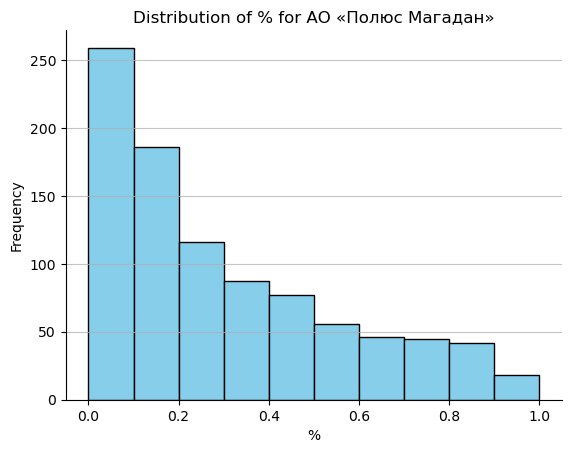

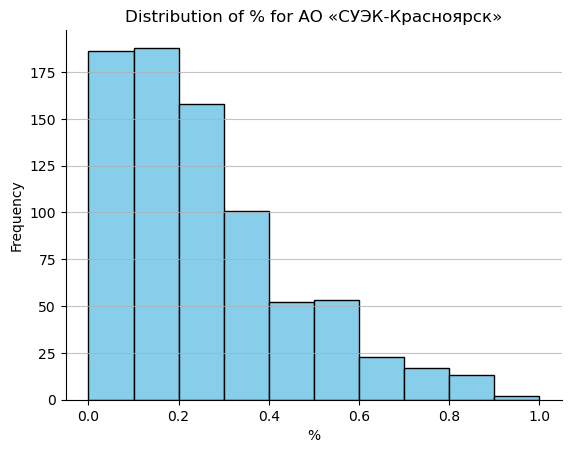

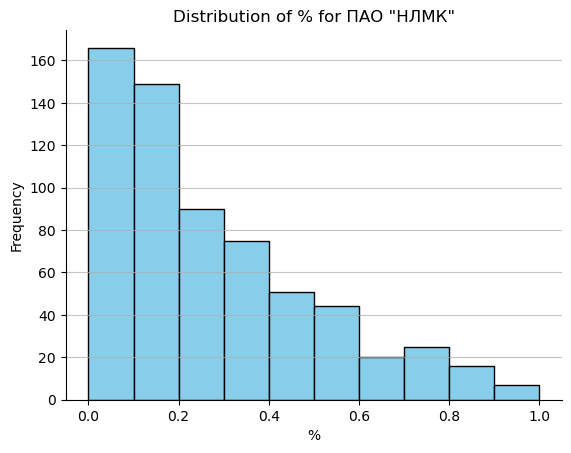

In [12]:
count_per_legal_entity = df_delivery['BE'].value_counts()

mean_delivery_percentage = df_delivery[df_delivery['delivery'] != 0].groupby('BE')['%'].mean()

# Фильтрация БЕ, у которых среднее значение % > 0.25 и количество строк более 100
selected_legal_entities = mean_delivery_percentage[(mean_delivery_percentage > 0.25) & (count_per_legal_entity > 100)].index

# Построение гистограмм для выбранных БЕ
for legal_entity in selected_legal_entities:
    plt.figure()
    plt.hist(df_delivery[df_delivery['BE'] == legal_entity]['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black')
    plt.title(f'Distribution of % for {legal_entity}')
    plt.xlabel('%')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

In [13]:
#БЕ
mean_delivery_percentage = df_delivery[df_delivery['delivery'] != 0].groupby('BE')['%'].mean()
selected_legal_entities = mean_delivery_percentage[mean_delivery_percentage>0.0].index
n = 0
x = 0
for legal_entity in selected_legal_entities:
    data_selected = df_delivery[df_delivery['BE'] == legal_entity]['%']
    statistic, p_value = mannwhitneyu(data_selected, df_delivery['%'], alternative='greater')
    x += 1
    # Вывод результатов сравнения
    if p_value < 0.05:
        print(f"\nДля {legal_entity}: Распределение превышает общее распределение (статистически значимо)\n" + str(p_value))
        n += 1
        
print()
print(str(n/x*100) + '% БЕ статистически превышают общий показатель')


Для АО «Полюс Алдан»: Распределение превышает общее распределение (статистически значимо)
6.886865850458352e-07

Для АО «Полюс Логистика»: Распределение превышает общее распределение (статистически значимо)
9.868207547239253e-18

Для АО «Полюс Магадан»: Распределение превышает общее распределение (статистически значимо)
4.698674003659883e-14

Для АО «СУЭК-Красноярск»: Распределение превышает общее распределение (статистически значимо)
1.8779863554793152e-09

Для ПАО "НЛМК": Распределение превышает общее распределение (статистически значимо)
1.5555899274177062e-08

21.73913043478261% БЕ статистически превышают общий показатель


    Взглянем на влияние остальных параметров (sup - поставщик, cat - каталог, stock - в наличии):

In [14]:
#Поставщик
mean_delivery_percentage = df_delivery[df_delivery['delivery'] != 0].groupby('sup')['%'].mean()
selected_legal_entities = mean_delivery_percentage[mean_delivery_percentage>0.0].index
n = 0
x = 0
for legal_entity in selected_legal_entities:
    data_selected = df_delivery[df_delivery['sup'] == legal_entity]['%']
    statistic, p_value = mannwhitneyu(data_selected, df_delivery['%'], alternative='greater')
    x += 1
    # Вывод результатов сравнения
    if p_value < 0.05:
        n += 1
        if p_value < 10 ** -10:
            print(f"\nДля {legal_entity}: Распределение превышает общее распределение (статистически значимо)\n" + str(p_value))
print()
print(str(n/x*100) + '% Поставщиков статистически превышают общий показатель')


Для 442: Распределение превышает общее распределение (статистически значимо)
1.5485188400688965e-11

Для 49: Распределение превышает общее распределение (статистически значимо)
8.625542298738298e-42

Для 498: Распределение превышает общее распределение (статистически значимо)
4.515771329775622e-27

Для 530: Распределение превышает общее распределение (статистически значимо)
2.311756941247401e-25

Для 914: Распределение превышает общее распределение (статистически значимо)
1.5222671206490735e-25

20.606060606060606% Поставщиков статистически превышают общий показатель


In [15]:
#Каталог
mean_delivery_percentage = df_delivery[df_delivery['delivery'] != 0].groupby('cat')['%'].mean()
selected_legal_entities = mean_delivery_percentage[mean_delivery_percentage>0.0].index
n = 0
x = 0
for legal_entity in selected_legal_entities:
    data_selected = df_delivery[df_delivery['cat'] == legal_entity]['%']
    statistic, p_value = mannwhitneyu(data_selected, df_delivery['%'], alternative='greater')
    x += 1
    # Вывод результатов сравнения
    if p_value < 0.05:
        n += 1
        if p_value < 10 ** -10:
            print(f"\nДля {legal_entity}: Распределение превышает общее распределение (статистически значимо)\n" + str(p_value))
print()
print(str(n/x*100) + '% Каталогов статистически превышают общий показатель')


Для 59: Распределение превышает общее распределение (статистически значимо)
8.625542298738298e-42

Для 256: Распределение превышает общее распределение (статистически значимо)
6.5353038404436616e-12

Для 306: Распределение превышает общее распределение (статистически значимо)
2.311756941247401e-25

Для 367: Распределение превышает общее распределение (статистически значимо)
4.515771329775622e-27

Для 628: Распределение превышает общее распределение (статистически значимо)
6.734416979810125e-12

Для 785: Распределение превышает общее распределение (статистически значимо)
3.612624962055343e-11

19.12350597609562% Каталогов статистически превышают общий показатель


In [16]:
#Наличие
mean_delivery_percentage = df_delivery[df_delivery['delivery'] != 0].groupby('stock')['%'].mean()
selected_legal_entities = mean_delivery_percentage[mean_delivery_percentage>0.0].index
n = 0
x = 0
for legal_entity in selected_legal_entities:
    data_selected = df_delivery[df_delivery['stock'] == legal_entity]['%']
    statistic, p_value = mannwhitneyu(data_selected, df_delivery['%'], alternative='greater')
    x += 1
    # Вывод результатов сравнения
    if p_value < 0.05:
        n += 1
        if p_value < 10 ** -10:
            print(f"\nДля {legal_entity}: Распределение превышает общее распределение (статистически значимо)\n" + str(p_value))
print()
print(str(n/x*100) + '% Сток статистически превышают общий показатель')


Для True: Распределение превышает общее распределение (статистически значимо)
7.685070043203438e-32

50.0% Сток статистически превышают общий показатель


In [17]:
system_status_dict = {value: index for index, value in enumerate(df_delivery['BE'].unique())}
df_delivery['BE_id'] = df_delivery['BE'].map(system_status_dict)
df_delivery['sup'] = df_delivery['sup'].astype(int)
correlation_matrix = df_delivery[['%', 'stock', 'BE_id', 'sup', 'cat', 'price']].corr()
correlation_matrix

,%,stock,BE_id,sup,cat,price
%,1.000000,0.138629,0.078219,0.091260,0.061524,-0.180802
stock,0.138629,1.000000,0.091228,0.056645,-0.137526,-0.068829
BE_id,0.078219,0.091228,1.000000,0.028182,0.022988,-0.019325
sup,0.091260,0.056645,0.028182,1.000000,0.725561,0.036658
cat,0.061524,-0.137526,0.022988,0.725561,1.000000,0.050673
price,-0.180802,-0.068829,-0.019325,0.036658,0.050673,1.000000


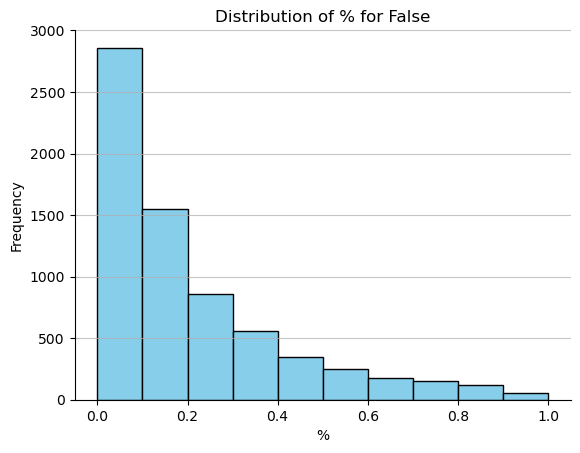

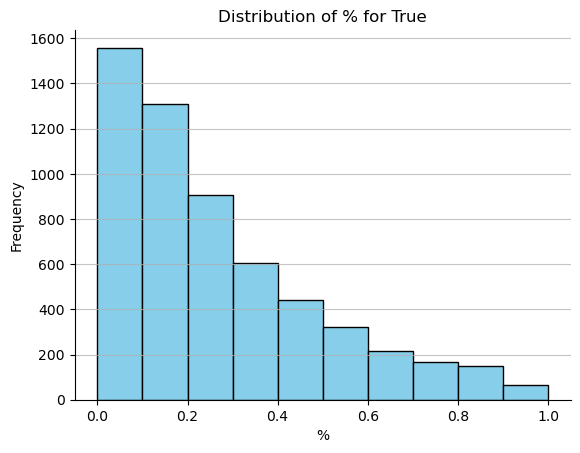

In [18]:
mean_delivery_percentage = df_delivery[df_delivery['delivery'] != 0].groupby('stock')['%'].mean()

# Фильтрация юридических сущностей, у которых среднее значение % > 0.25
selected_legal_entities = mean_delivery_percentage[mean_delivery_percentage > 0].index

# Построение гистограмм для выбранных юридических сущностей
for legal_entity in selected_legal_entities:
    plt.figure()
    plt.hist(df_delivery[df_delivery['stock'] == legal_entity]['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black')
    plt.title(f'Distribution of % for {legal_entity}')
    plt.xlabel('%')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

## Анализ заказов:  

    Для заказов таблица будет выглядеть иначе, т.к.подзаказы включают в себя разную стоимость доставки, изменяя итоговый %:

In [19]:
be1 = df_order.groupby('BE')['%'].mean().reset_index()
be2 = df_order[df_order['delivery'] != 0].groupby('BE')['%'].mean().reset_index()

# Объединение результатов с помощью merge по столбцу 'BE'
result = pd.merge(be1, be2, on='BE', suffixes=('_all', '_delivery')).sort_values('%_delivery', ascending=False)
result

,BE,%_all,%_delivery
6,АО «Полюс Магадан»,0.181800,0.207252
3,АО «Полюс Алдан»,0.162168,0.196645
21,"ПАО ""НЛМК""",0.166244,0.185340
7,АО «СУЭК-Красноярск»,0.073842,0.176334
22,"Филиал ООО ""НевРСС"" в г. Белореченск",0.146724,0.161397
17,ООО «ЕСК-СУЭК»,0.076590,0.158158
5,АО «Полюс Логистика»,0.114935,0.152394
11,"ООО ""ЕвроХим - УКК""",0.112384,0.151719
1,"АО ""НАК ""Азот""",0.095229,0.144599
2,"АО ""Невинномысский Азот""",0.114255,0.141676


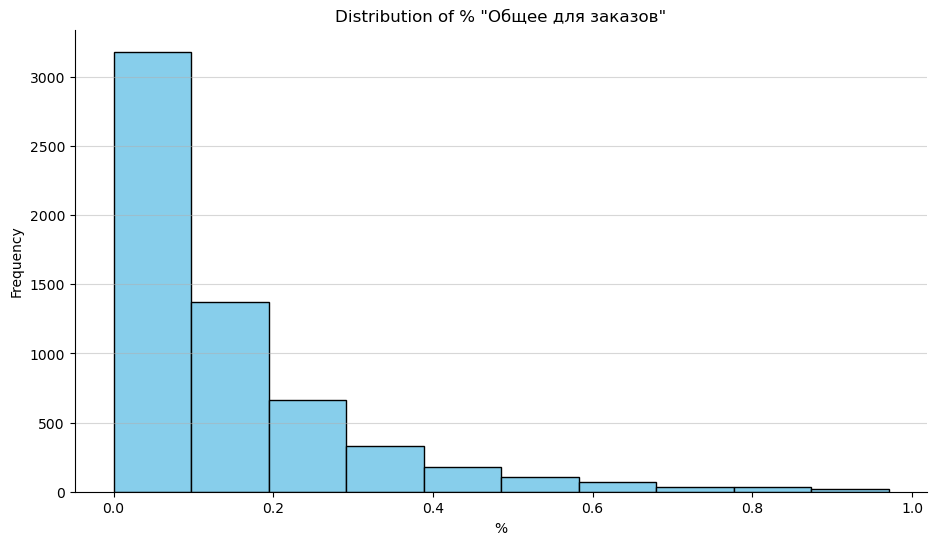

In [20]:
df_order_delivery = df_order[df_order['delivery'] != 0]
plt.figure(figsize=(11, 6))
plt.hist(df_order_delivery['%'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of % "Общее для заказов"')
plt.xlabel('%')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Общее распределение по заказам боле склаженное.
    
    Топы БЕ:

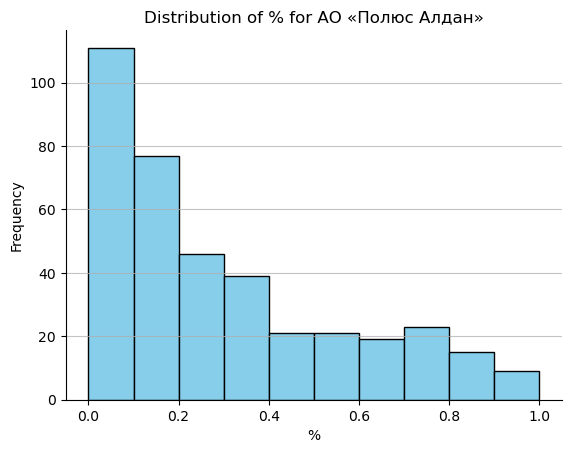

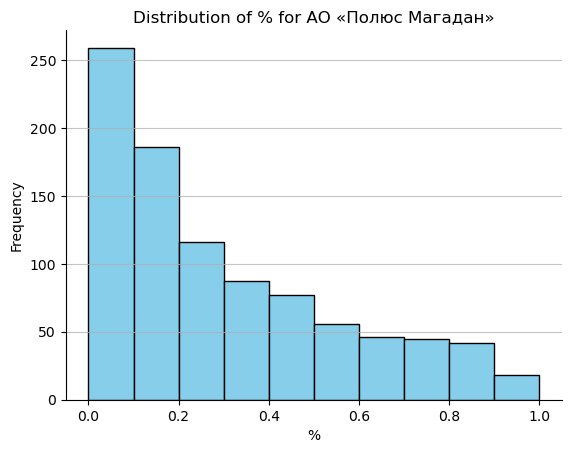

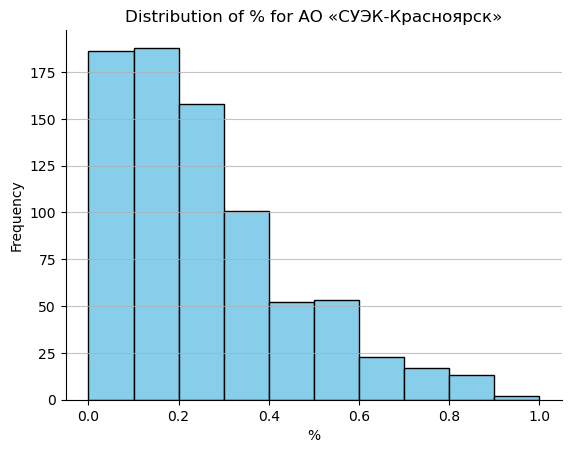

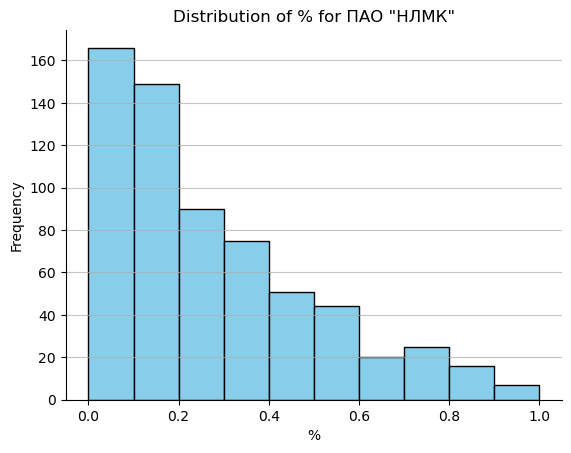

In [21]:
count_per_legal_entity = df_order['BE'].value_counts()

mean_delivery_percentage = df_order[df_order['delivery'] != 0].groupby('BE')['%'].mean()

# Фильтрация БЕ, у которых среднее значение % > 0.25 и количество строк более 100
selected_legal_entities = mean_delivery_percentage[(mean_delivery_percentage > 0.16) & (count_per_legal_entity > 100)].index

# Построение гистограмм для выбранных БЕ
for legal_entity in selected_legal_entities:
    plt.figure()
    plt.hist(df_delivery[df_delivery['BE'] == legal_entity]['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black')
    plt.title(f'Distribution of % for {legal_entity}')
    plt.xlabel('%')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

Заметно, что топы БЕ относительно заказов куда более сглаженны, нежели относительно подзаказов

In [22]:
#БЕ
mean_delivery_percentage = df_order[df_order['delivery'] != 0].groupby('BE')['%'].mean()
selected_legal_entities = mean_delivery_percentage[mean_delivery_percentage>0.0].index
n = 0
x = 0
for legal_entity in selected_legal_entities:
    data_selected = df_order[df_order['BE'] == legal_entity]['%']
    statistic, p_value = mannwhitneyu(data_selected, df_order['%'], alternative='greater')
    x += 1
    # Вывод результатов сравнения
    if p_value < 0.05:
        print(f"\nДля {legal_entity}: Распределение превышает общее распределение (статистически значимо)\n" + str(p_value))
        n += 1
        
print()
print(str(n/x*100) + '% БЕ статистически превышают общий показатель')


Для АО "Невинномысский Азот": Распределение превышает общее распределение (статистически значимо)
0.031256847966271005

Для АО «Полюс Алдан»: Распределение превышает общее распределение (статистически значимо)
1.1255573512596553e-11

Для АО «Полюс Логистика»: Распределение превышает общее распределение (статистически значимо)
2.458449227980121e-11

Для АО «Полюс Магадан»: Распределение превышает общее распределение (статистически значимо)
1.1512298609763728e-32

Для ООО "ЕвроХим - УКК": Распределение превышает общее распределение (статистически значимо)
0.02440535885888617

Для ООО "НовомосковскРСС": Распределение превышает общее распределение (статистически значимо)
0.02453488035767627

Для ООО «ЕвроХим-БМУ»: Распределение превышает общее распределение (статистически значимо)
0.04062758274985754

Для ПАО "НЛМК": Распределение превышает общее распределение (статистически значимо)
1.2013177646151553e-31

Для Филиал ООО "НевРСС" в г. Белореченск: Распределение превышает общее распределе

Цель - снизить процент доставки от общей стоимости.

# Гипотезы для улучшения ситуации:

    H0 - Установление минимальной стоимости подзаказа в положительную сторону скажется на %:
    H0 - Установление минимальной стоимости заказа в положительную сторону скажется на %:
    H0 - Подзаказы имеют худшее распределение, нежели заказы:

## Подзаказы:
    
        Пробую найти оптимальную цену минимального заказа:

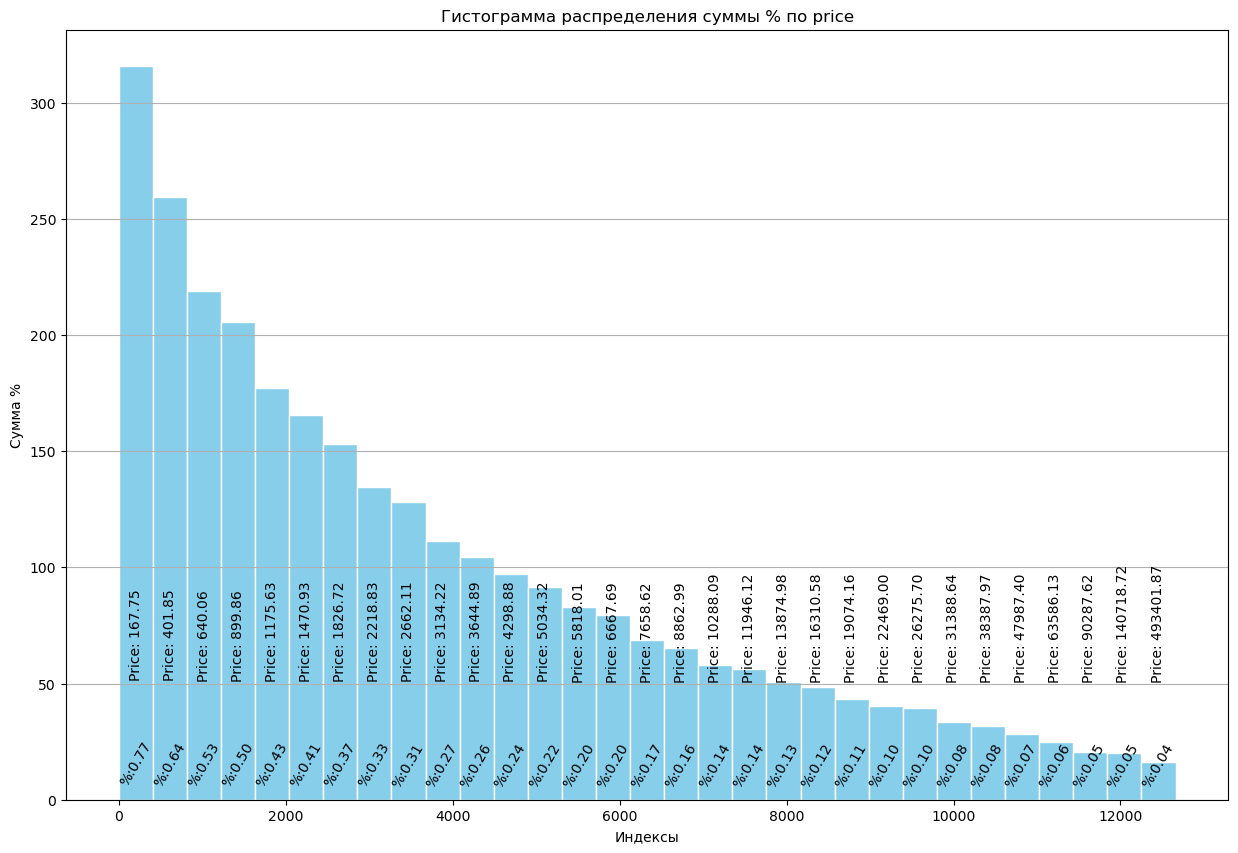

In [23]:
df_sorted = df_delivery.sort_values('price', ascending=True).reset_index()
bins = 31
bin_width = len(df_sorted) // bins

plt.figure(figsize=(15, 10))
plt.hist(df_sorted.index, bins=bins, weights=df_sorted['%'], color='skyblue', edgecolor='white')
plt.title('Гистограмма распределения суммы % по price')
plt.xlabel('Индексы')
plt.ylabel('Сумма %')
plt.grid(axis='y')

for i in range(bins):
    start_idx = i * bin_width
    end_idx = (i + 1) * bin_width if i < bins - 1 else len(df_sorted)
    avg_percentage = df_sorted.iloc[start_idx:end_idx]['%'].mean()
    avg_price = df_sorted.iloc[start_idx:end_idx]['price'].mean()
    
    # Распределение подписей
    text_height_percentage = avg_percentage + 4.12
    text_height_price = avg_percentage + 50.5  # Увеличьте значение для расположения выше
    
    plt.text((start_idx + end_idx) / 2, text_height_percentage, f'%:{avg_percentage:.2f}', ha='center', va='bottom', rotation=60)
    plt.text((start_idx + end_idx) / 2, text_height_price, f'Price: {avg_price:.2f}', ha='center', va='bottom', rotation=90)

plt.show()

Выше - распределение среднего процента % = delivery/(price+delivery), что уходит на доставку по прайсу без доставки.

Ниже - Переменная, изменяя которую можно отсеять некоторую часть подзаказов и средний процент в них.

In [24]:
x = 1000

In [25]:
print(str(len(df_delivery[df_delivery['price'] > x])) + ' - подзаказов останется')
print(str(df_delivery[df_delivery['price'] > x]['%'].mean()) + '%\n')
print(str(len(df_delivery[df_delivery['price'] <= x])) + ' - подзаказов отсеется')
print(str(df_delivery[df_delivery['price'] <= x]['%'].mean()) + '%\n')
print(str(len(df_delivery['price'])) + ' - подзаказов было')
print(str(df_delivery['%'].mean()) + '% - общий средний процент\n')

11085 - подзаказов останется
0.18023292165969623%

1576 - подзаказов отсеется
0.6171175642178689%

12661 - подзаказов было
0.2346148975440403% - общий средний процент



#### Проверяем гипотезу о том, что % в df_low_price > % в df_high_price:

In [26]:
for i in range (1,10):
    df_high_price = df_delivery[df_delivery['price'] > i*1000]
    df_low_price = df_delivery[df_delivery['price'] <= i*1000]

    #Stat-test
    statistic, p_value = mannwhitneyu(df_low_price['%'], df_high_price['%'], alternative='greater')
    if p_value < 0.05:    
        print('Итерация № '+str(i)+'\n'+'p_value: '+str(p_value))
        break

Итерация № 1
p_value: 0.0


    Построим гистограмму двух распределений процента при переменной X для ненулевой доставки:

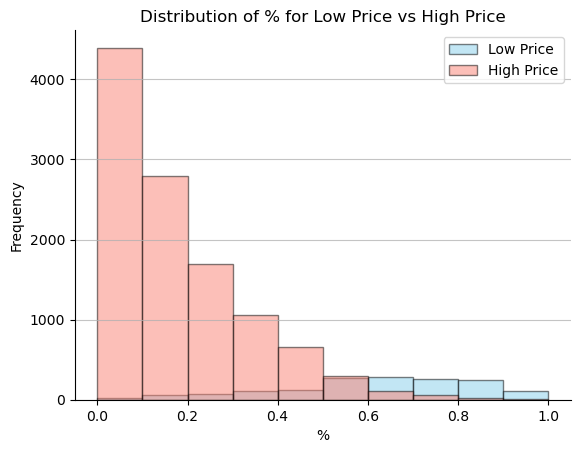

In [27]:
    df_high_price = df_delivery[df_delivery['price'] > x]
    df_low_price = df_delivery[df_delivery['price'] <= x]

plt.figure()

# Построение гистограммы для df_low_price
plt.hist(df_low_price['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black', alpha=0.5, label='Low Price')

# Построение гистограммы для df_high_price
plt.hist(df_high_price['%'], bins=10, range=(0, 1), color='salmon', edgecolor='black', alpha=0.5, label='High Price')

# Добавление легенды
plt.legend()

# Добавление заголовка и меток осей
plt.title('Distribution of % for Low Price vs High Price')
plt.xlabel('%')
plt.ylabel('Frequency')

# Отображение сетки и удаление верхней и правой рамок
plt.grid(axis='y', alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Показать график
plt.show()

 ####  Теперь необходимо взглянуть на распределение подзаказов с нулевой доставкой:

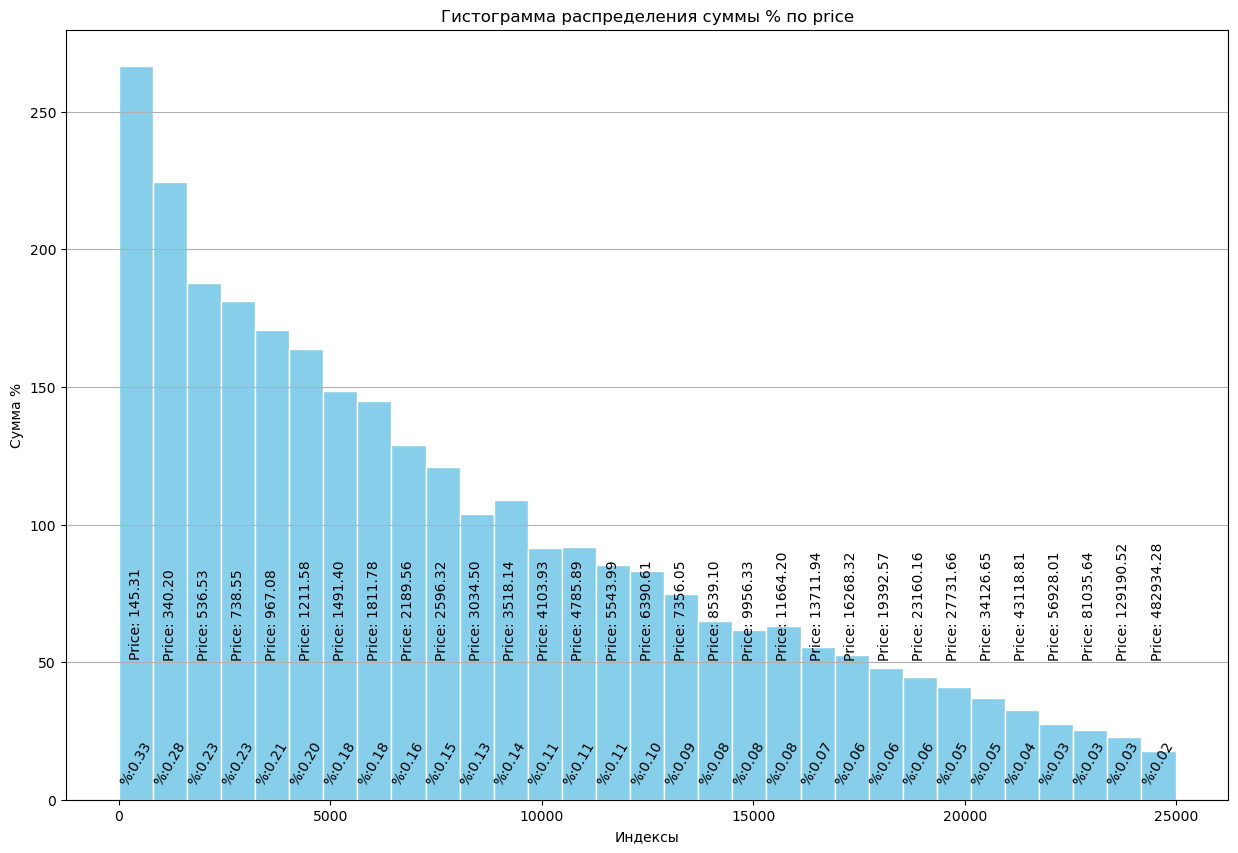

In [91]:
df_sorted = df.sort_values('price', ascending=True).reset_index()
bins = 31
bin_width = len(df_sorted) // bins

plt.figure(figsize=(15, 10))
plt.hist(df_sorted.index, bins=bins, weights=df_sorted['%'], color='skyblue', edgecolor='white')
plt.title('Гистограмма распределения суммы % по price')
plt.xlabel('Индексы')
plt.ylabel('Сумма %')
plt.grid(axis='y')

for i in range(bins):
    start_idx = i * bin_width
    end_idx = (i + 1) * bin_width if i < bins - 1 else len(df_sorted)
    avg_percentage = df_sorted.iloc[start_idx:end_idx]['%'].mean()
    avg_price = df_sorted.iloc[start_idx:end_idx]['price'].mean()
    
    # Распределение подписей
    text_height_percentage = avg_percentage + 4.12
    text_height_price = avg_percentage + 50.5  # Увеличьте значение для расположения выше
    
    plt.text((start_idx + end_idx) / 2, text_height_percentage, f'%:{avg_percentage:.2f}', ha='center', va='bottom', rotation=60)
    plt.text((start_idx + end_idx) / 2, text_height_price, f'Price: {avg_price:.2f}', ha='center', va='bottom', rotation=90)

plt.show()

In [29]:
x = 1000

In [30]:
print(str(len(df[df['price'] > x])) + ' - подзаказов останется')
print(str(df[df['price'] > x]['%'].mean()) + '%\n')
print(str(len(df[df['price'] <= x])) + ' - подзаказов отсеется')
print(str(df[df['price'] <= x]['%'].mean()) + '%\n')
print(str(len(df['price'])) + ' - подзаказов было')
print(str(df['%'].mean()) + '% - общий средний процент\n')

21245 - подзаказов останется
0.09404010056943904%

3737 - подзаказов отсеется
0.26025616302043386%

24982 - подзаказов было
0.11890397957749956% - общий средний процент



In [31]:
for i in range (1,10):
    df_high_price = df[df['price'] > i*1000]
    df_low_price = df[df['price'] <= i*1000]

    #Stat-test
    statistic, p_value = mannwhitneyu(df_low_price['%'], df_high_price['%'], alternative='greater')
    if p_value < 0.05:    
        print('Итерация № '+str(i)+'\n'+'p_value: '+str(p_value))
        break

Итерация № 1
p_value: 1.3450238392587213e-21


    Построим гистограмму двух распределений процента при переменной X для полных данных:

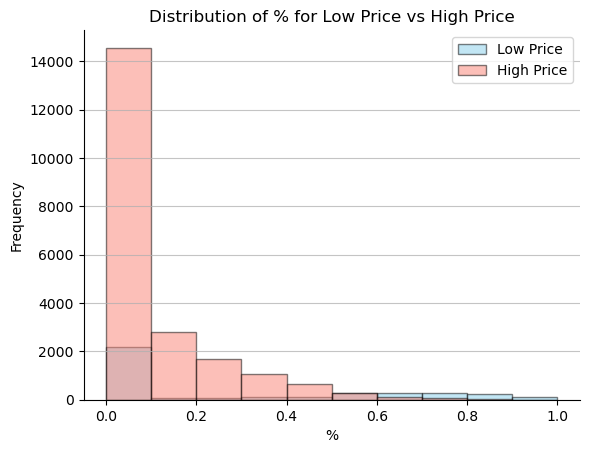

In [32]:
plt.figure()

# Построение гистограммы для df_low_price
plt.hist(df_low_price['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black', alpha=0.5, label='Low Price')

# Построение гистограммы для df_high_price
plt.hist(df_high_price['%'], bins=10, range=(0, 1), color='salmon', edgecolor='black', alpha=0.5, label='High Price')

# Добавление легенды
plt.legend()

# Добавление заголовка и меток осей
plt.title('Distribution of % for Low Price vs High Price')
plt.xlabel('%')
plt.ylabel('Frequency')

# Отображение сетки и удаление верхней и правой рамок
plt.grid(axis='y', alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Показать график
plt.show()

#### Гипотеза подтверждена в обоих случаях.

    

Однако, рекомендуется устанавливать минимальную цену только на подзаказы с платной доставкой, чтобы избежать потерю подзаказов.

## Заказы:
    
        Пробую найти оптимальную цену минимального заказа:

In [33]:
df_order_delivery = df_order[df_order['delivery'] != 0]

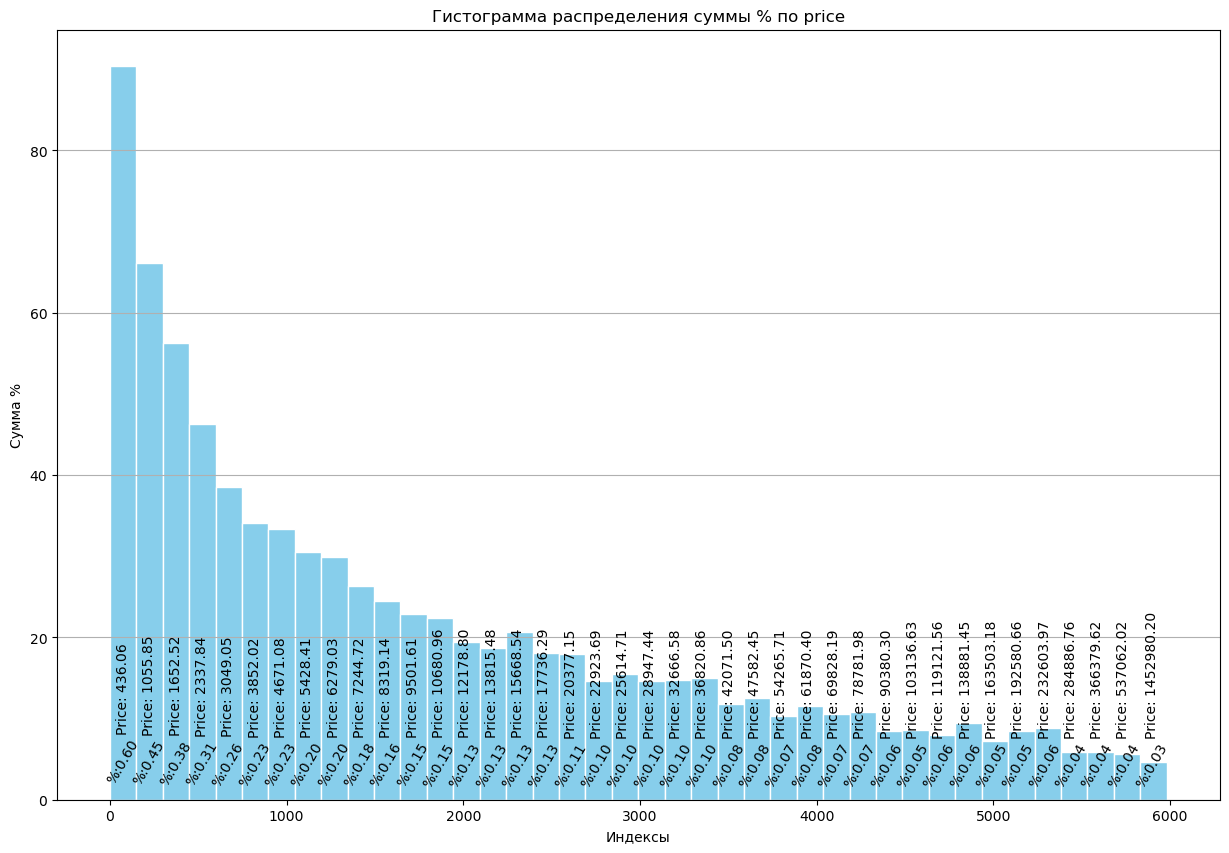

In [34]:
df_sorted = df_order_delivery.sort_values('price', ascending=True).reset_index()
bins = 40
bin_width = len(df_sorted) // bins

plt.figure(figsize=(15, 10))
plt.hist(df_sorted.index, bins=bins, weights=df_sorted['%'], color='skyblue', edgecolor='white')
plt.title('Гистограмма распределения суммы % по price')
plt.xlabel('Индексы')
plt.ylabel('Сумма %')
plt.grid(axis='y')

for i in range(bins):
    start_idx = i * bin_width
    end_idx = (i + 1) * bin_width if i < bins - 1 else len(df_sorted)
    avg_percentage = df_sorted.iloc[start_idx:end_idx]['%'].mean()
    avg_price = df_sorted.iloc[start_idx:end_idx]['price'].mean()
    
    # Распределение подписей
    text_height_percentage = avg_percentage + 1.12
    text_height_price = avg_percentage + 7.5  # Увеличьте значение для расположения выше
    
    plt.text((start_idx + end_idx) / 2, text_height_percentage, f'%:{avg_percentage:.2f}', ha='center', va='bottom', rotation=60)
    plt.text((start_idx + end_idx) / 2, text_height_price, f'Price: {avg_price:.2f}', ha='center', va='bottom', rotation=90)

plt.show()

Выше - распределение среднего процента % = delivery/(price+delivery), что уходит на доставку по прайсу без доставки.

Ниже - Переменная, изменяя которую можно отсеять некоторую часть подзаказов и средний процент в них.

In [35]:
y = 3000

In [36]:
print(str(len(df_order_delivery[df_order_delivery['price'] > y])) + ' - заказов останется')
print(str(df_order_delivery[df_order_delivery['price'] > y]['%'].mean()) + '%\n')
print(str(len(df_order_delivery[df_order_delivery['price'] <= y])) + ' - заказов отсеется')
print(str(df_order_delivery[df_order_delivery['price'] <= y]['%'].mean()) + '%\n')
print(str(len(df_order_delivery['price'])) + ' - заказов было')
print(str(df_order_delivery['%'].mean()) + '% - общий средний процент\n')

5322 - заказов останется
0.10608107811343341%

660 - заказов отсеется
0.41683043248085266%

5982 - заказов было
0.14036636294835428% - общий средний процент



In [37]:
for i in range (1,10):
    df_high_price = df_order_delivery[df_order_delivery['price'] > i*1000]
    df_low_price = df_order_delivery[df_order_delivery['price'] <= i*1000]

    #Stat-test
    statistic, p_value = mannwhitneyu(df_low_price['%'], df_high_price['%'], alternative='greater')
    if p_value < 0.05:    
        print('Итерация № '+str(i)+'\n'+'p_value: '+str(p_value))
        break

Итерация № 1
p_value: 1.103365611549787e-104


    Построим гистограмму двух распределений процента при переменной X:

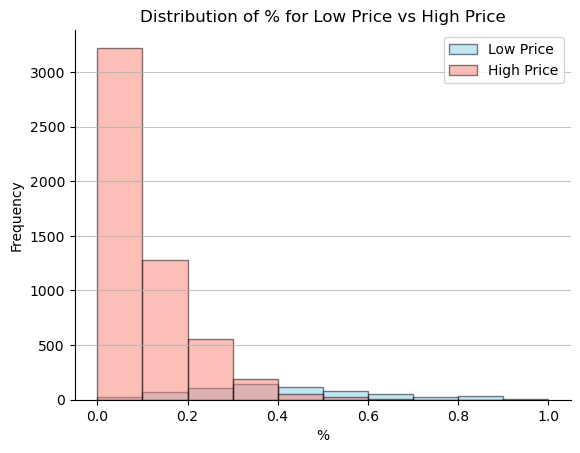

In [38]:
df_high_price = df_order_delivery[df_order_delivery['price'] > y]
df_low_price = df_order_delivery[df_order_delivery['price'] <= y]

plt.figure()

# Построение гистограммы для df_low_price
plt.hist(df_low_price['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black', alpha=0.5, label='Low Price')

# Построение гистограммы для df_high_price
plt.hist(df_high_price['%'], bins=10, range=(0, 1), color='salmon', edgecolor='black', alpha=0.5, label='High Price')

# Добавление легенды
plt.legend()

# Добавление заголовка и меток осей
plt.title('Distribution of % for Low Price vs High Price')
plt.xlabel('%')
plt.ylabel('Frequency')

# Отображение сетки и удаление верхней и правой рамок
plt.grid(axis='y', alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Показать график
plt.show()

In [39]:
df_order

,order,BE,price,delivery,full_price,%
0,AIM0006-0001,АО «СУЭК-Красноярск»,8840.00,2239.20,11079.20,0.202108
1,AIM0006-0002,АО «СУЭК-Красноярск»,1259.17,1433.33,2692.50,0.532342
2,AIM0006-0003,АО «СУЭК-Красноярск»,48818.00,0.00,48818.00,0.000000
3,AIM0006-0004,АО «СУЭК-Красноярск»,4630.11,0.00,4630.11,0.000000
4,AIM0006-0005,АО «СУЭК-Красноярск»,10118.93,0.00,10118.93,0.000000
...,...,...,...,...,...,...
9140,PL2852-0019,ООО «Управляющая компания Полюс»,219847.78,0.00,219847.78,0.000000
9141,PL2852-0022,ООО «Управляющая компания Полюс»,22662.70,0.00,22662.70,0.000000
9142,PL2852-0029,ООО «Управляющая компания Полюс»,98600.16,1666.32,100266.48,0.016619
9143,PL2852-0030,ООО «Управляющая компания Полюс»,4654.60,0.00,4654.60,0.000000


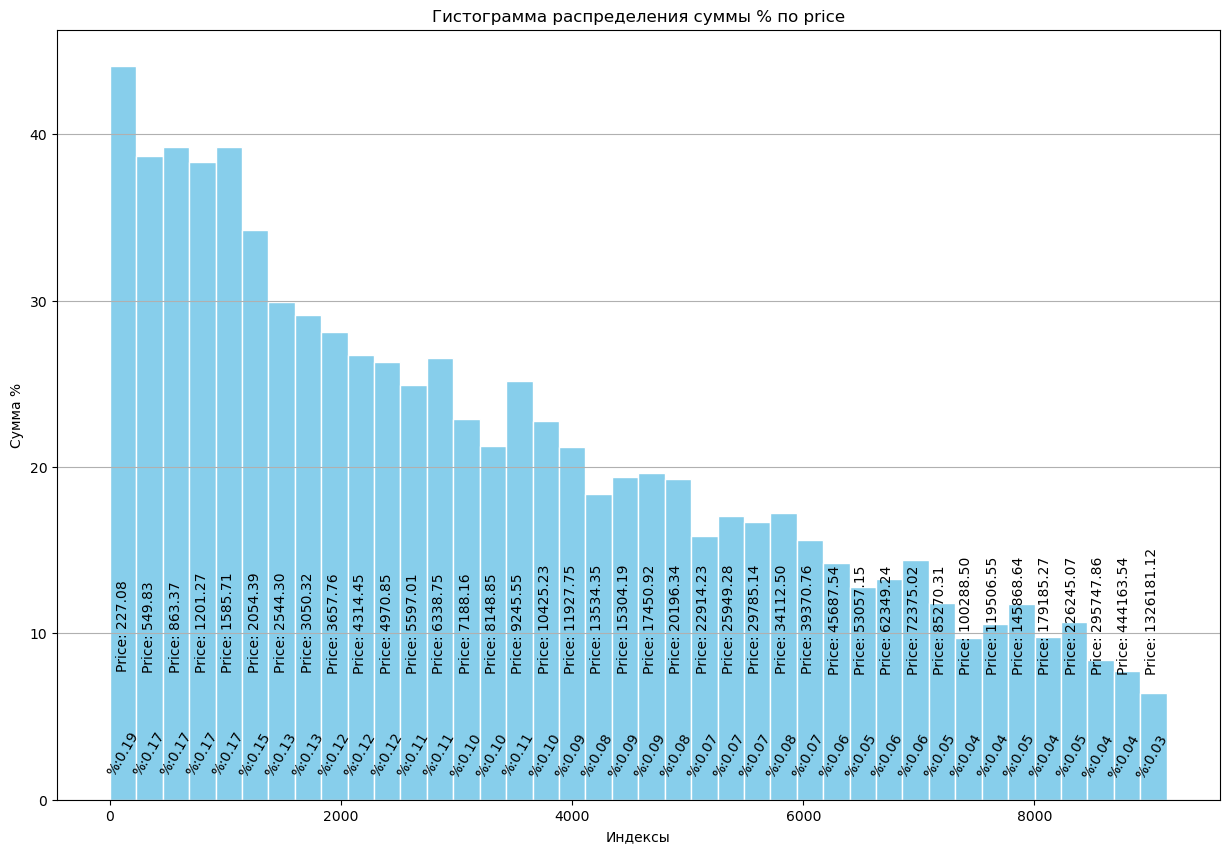

In [40]:
df_sorted = df_order.sort_values('price', ascending=True).reset_index()
bins = 40
bin_width = len(df_sorted) // bins

plt.figure(figsize=(15, 10))
plt.hist(df_sorted.index, bins=bins, weights=df_sorted['%'], color='skyblue', edgecolor='white')
plt.title('Гистограмма распределения суммы % по price')
plt.xlabel('Индексы')
plt.ylabel('Сумма %')
plt.grid(axis='y')

for i in range(bins):
    start_idx = i * bin_width
    end_idx = (i + 1) * bin_width if i < bins - 1 else len(df_sorted)
    avg_percentage = df_sorted.iloc[start_idx:end_idx]['%'].mean()
    avg_price = df_sorted.iloc[start_idx:end_idx]['price'].mean()
    
    # Распределение подписей
    text_height_percentage = avg_percentage + 1.12
    text_height_price = avg_percentage + 7.5  # Увеличьте значение для расположения выше
    
    plt.text((start_idx + end_idx) / 2, text_height_percentage, f'%:{avg_percentage:.2f}', ha='center', va='bottom', rotation=60)
    plt.text((start_idx + end_idx) / 2, text_height_price, f'Price: {avg_price:.2f}', ha='center', va='bottom', rotation=90)

plt.show()

In [41]:
y = 3000

In [42]:
print(str(len(df_order[df_order['price'] > y])) + ' - заказов останется')
print(str(df_order[df_order['price'] > y]['%'].mean()) + '%\n')
print(str(len(df_order[df_order['price'] <= y])) + ' - заказов отсеется')
print(str(df_order[df_order['price'] <= y]['%'].mean()) + '%\n')
print(str(len(df_order['price'])) + ' - заказов было')
print(str(df_order['%'].mean()) + '% - общий средний процент\n')

7453 - заказов останется
0.0757498319763441%

1692 - заказов отсеется
0.16259343110955246%

9145 - заказов было
0.09181755966725591% - общий средний процент



In [43]:
for i in range (1,100):
    df_high_price = df_order[df_order['price'] > i*1000]
    df_low_price = df_order[df_order['price'] <= i*1000]

    #Stat-test
    statistic, p_value = mannwhitneyu(df_low_price['%'], df_high_price['%'], alternative='greater')
    if p_value < 0.05:    
        print('Итерация № '+str(i)+'\n'+'p_value: '+str(p_value)+'\nМинимально необходимая сумма подзаказа: '+str(i*1000))
        break

Итерация № 13
p_value: 0.03510940355014216
Минимально необходимая сумма подзаказа: 13000


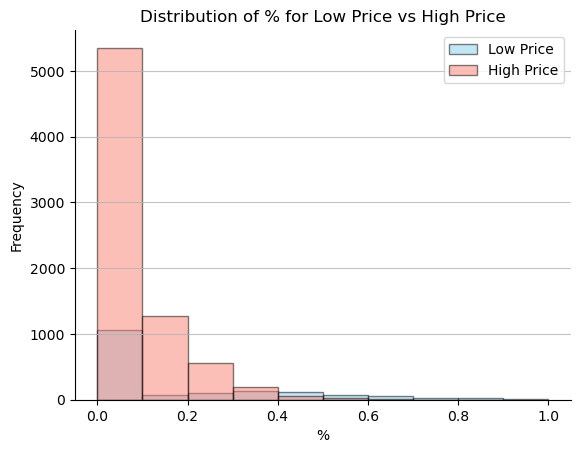

In [44]:
df_high_price = df_order[df_order['price'] > y]
df_low_price = df_order[df_order['price'] <= y]

plt.figure()

# Построение гистограммы для df_low_price
plt.hist(df_low_price['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black', alpha=0.5, label='Low Price')

# Построение гистограммы для df_high_price
plt.hist(df_high_price['%'], bins=10, range=(0, 1), color='salmon', edgecolor='black', alpha=0.5, label='High Price')

# Добавление легенды
plt.legend()

# Добавление заголовка и меток осей
plt.title('Distribution of % for Low Price vs High Price')
plt.xlabel('%')
plt.ylabel('Frequency')

# Отображение сетки и удаление верхней и правой рамок
plt.grid(axis='y', alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Показать график
plt.show()

#### Гипотеза подтверждена лишь для подзаказов с ненулевой стоимостью доставки. Для включения нулевой стоимости доставки, необходим порог в 16 тыс. рублей минимального заказа.



    H0 - Подзаказы имеют худшее распределение, нежели заказы (Заказы сглаживаются):

In [45]:
statistic, p_value = mannwhitneyu(df['%'], df_order['%'], alternative='greater')
print(p_value)
statistic, p_value = mannwhitneyu(df_delivery['%'], df_order_delivery['%'], alternative='greater')
print(p_value)

0.999999999999999
4.010965716663789e-215


Гипотеза принимается во втором случае: Подзаказ без нулевых доставок больше заказа без нулевых доставок.

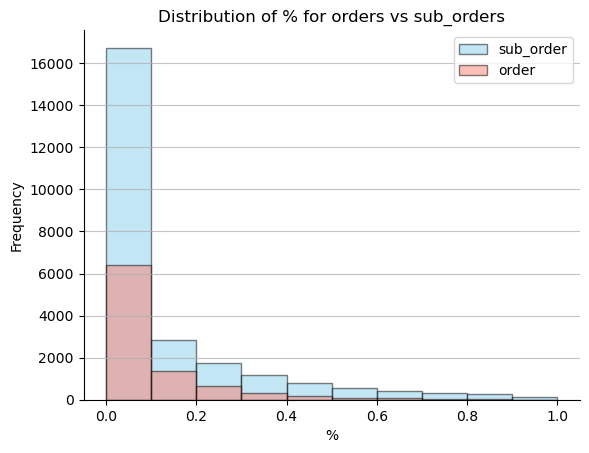

In [46]:
plt.figure()

# Построение гистограммы для df_low_price
plt.hist(df['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black', alpha=0.5, label='sub_order')

# Построение гистограммы для df_high_price
plt.hist(df_order['%'], bins=10, range=(0, 1), color='salmon', edgecolor='black', alpha=0.5, label='order')

# Добавление легенды
plt.legend()

# Добавление заголовка и меток осей
plt.title('Distribution of % for orders vs sub_orders')
plt.xlabel('%')
plt.ylabel('Frequency')

# Отображение сетки и удаление верхней и правой рамок
plt.grid(axis='y', alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Показать график
plt.show()

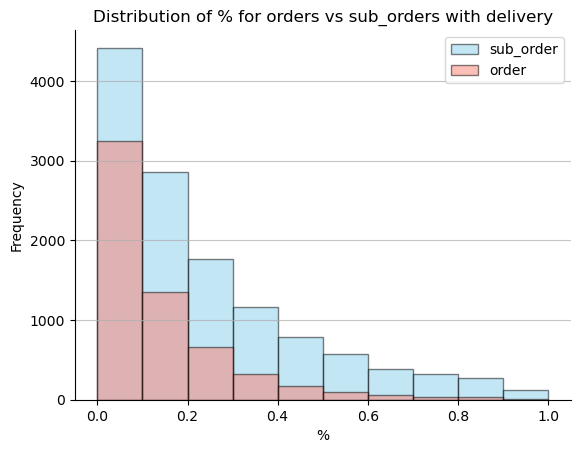

In [47]:
plt.figure()

# Построение гистограммы для df_low_price
plt.hist(df_delivery['%'], bins=10, range=(0, 1), color='skyblue', edgecolor='black', alpha=0.5, label='sub_order')

# Построение гистограммы для df_high_price
plt.hist(df_order_delivery['%'], bins=10, range=(0, 1), color='salmon', edgecolor='black', alpha=0.5, label='order')

# Добавление легенды
plt.legend()

# Добавление заголовка и меток осей
plt.title('Distribution of % for orders vs sub_orders with delivery')
plt.xlabel('%')
plt.ylabel('Frequency')

# Отображение сетки и удаление верхней и правой рамок
plt.grid(axis='y', alpha=0.75)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Показать график
plt.show()

### Сейчас имеет смысл рассматривать заказы (подзаказы чувствительнее, заказы проще регулировать со стороны МП) только с delivery (без delivery искажают % в меньшую сторону) в разрезе БЕ.

In [53]:
df_order_delivery

,order,BE,price,delivery,full_price,%
0,AIM0006-0001,АО «СУЭК-Красноярск»,8840.00,2239.20,11079.20,0.202108
1,AIM0006-0002,АО «СУЭК-Красноярск»,1259.17,1433.33,2692.50,0.532342
12,AIM0006-0013,АО «СУЭК-Красноярск»,23345.93,382.49,23728.42,0.016119
13,AIM0006-0014,АО «СУЭК-Красноярск»,24900.30,8881.20,33781.50,0.262901
14,AIM0006-0015,АО «СУЭК-Красноярск»,79107.84,1841.20,80949.04,0.022745
...,...,...,...,...,...,...
9135,PL2852-0012,ООО «Управляющая компания Полюс»,49122.50,1354.20,50476.70,0.026828
9137,PL2852-0014,ООО «Управляющая компания Полюс»,55600.08,1666.80,57266.88,0.029106
9138,PL2852-0015,ООО «Управляющая компания Полюс»,77100.12,1667.04,78767.16,0.021164
9142,PL2852-0029,ООО «Управляющая компания Полюс»,98600.16,1666.32,100266.48,0.016619


In [87]:
warnings.filterwarnings('ignore')

In [117]:
z = 3

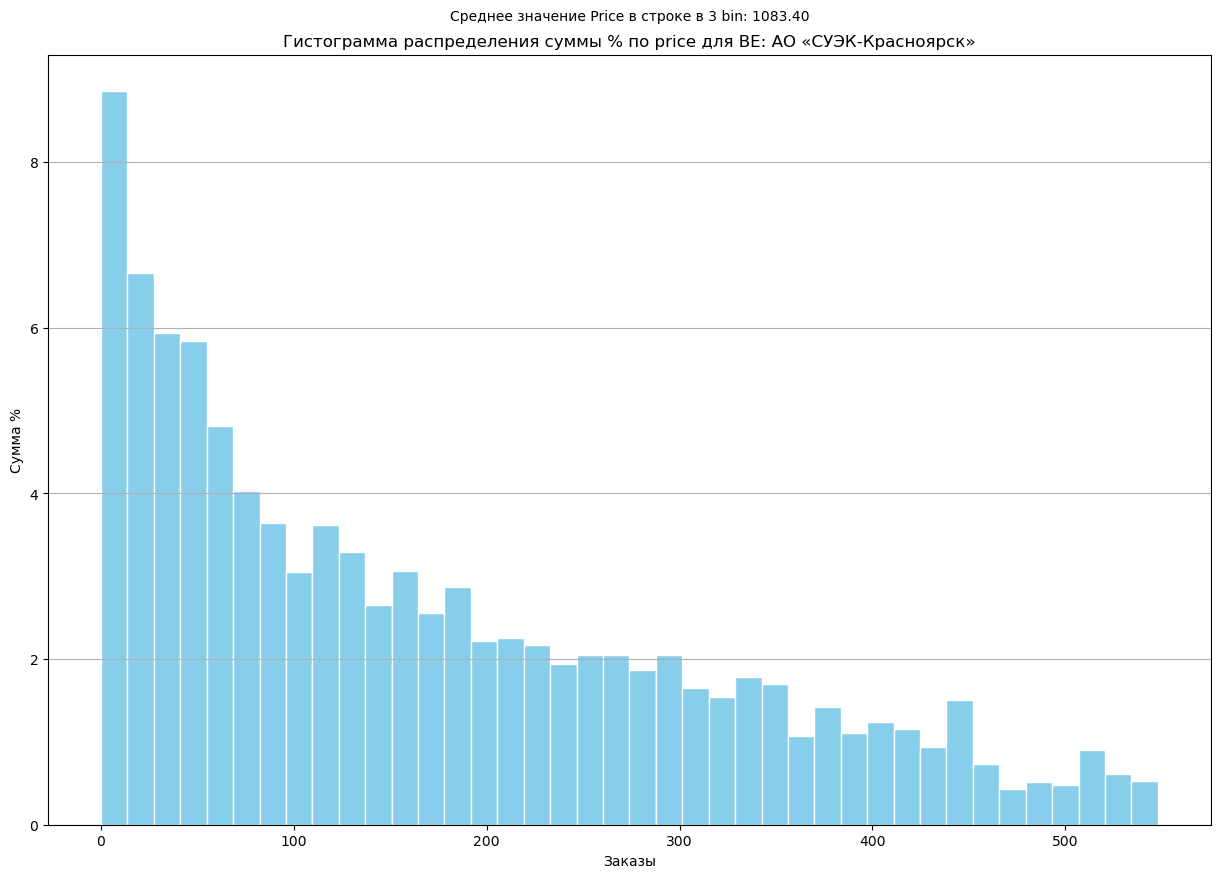

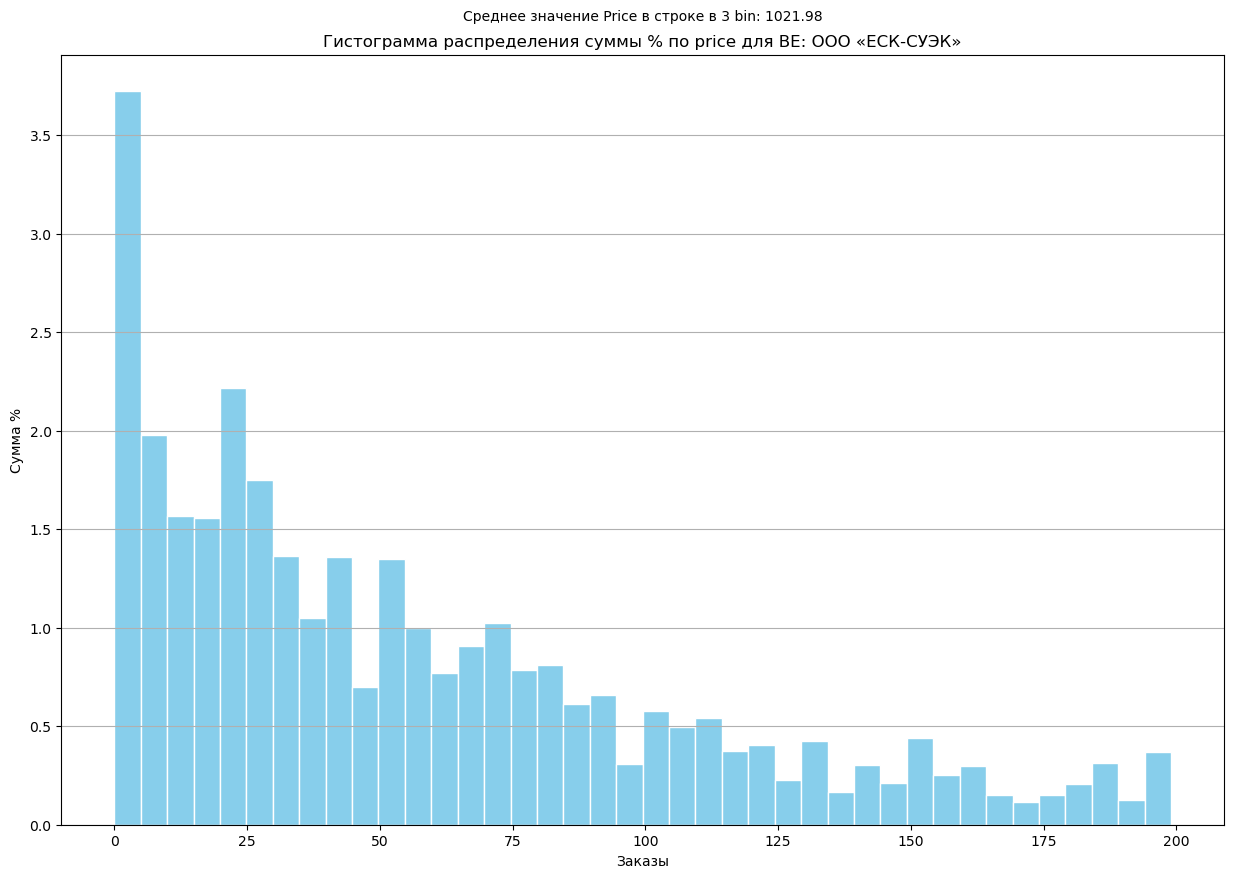

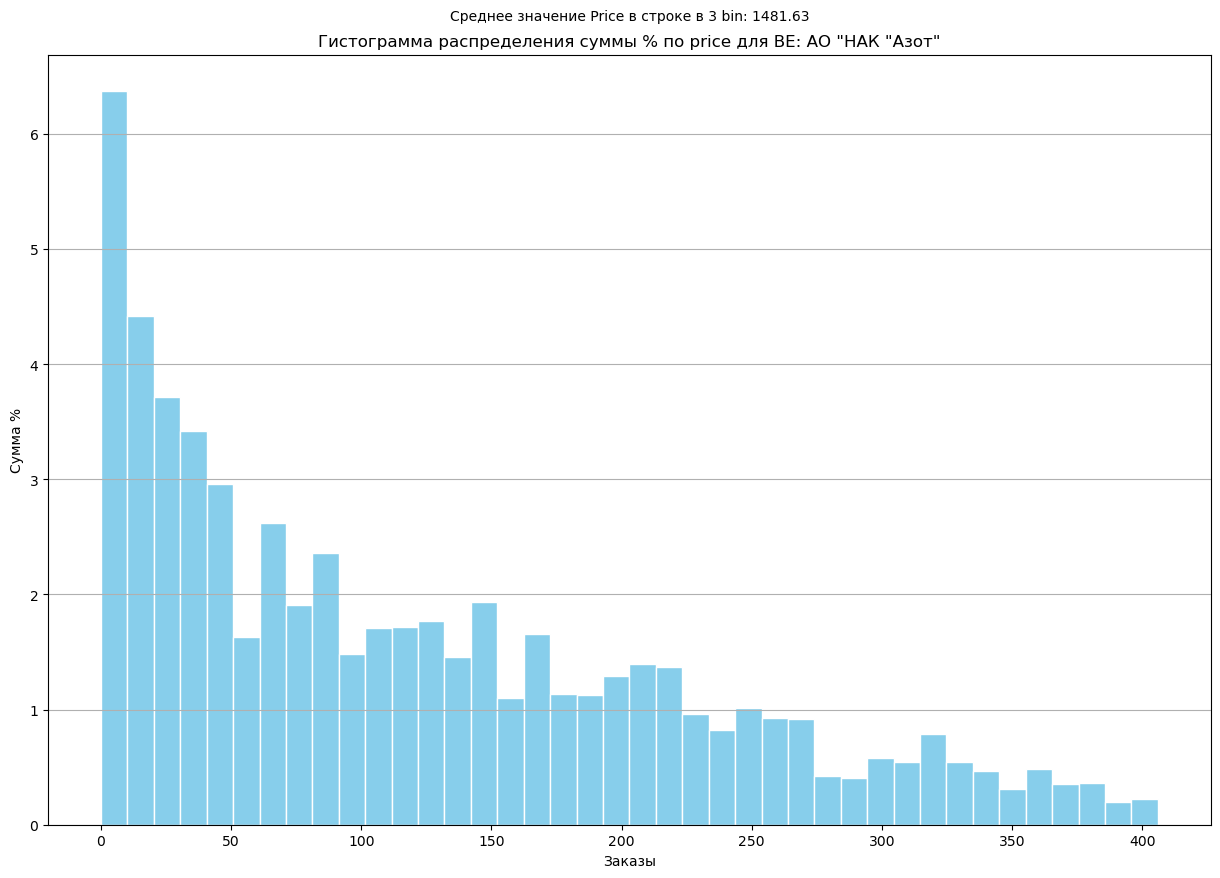

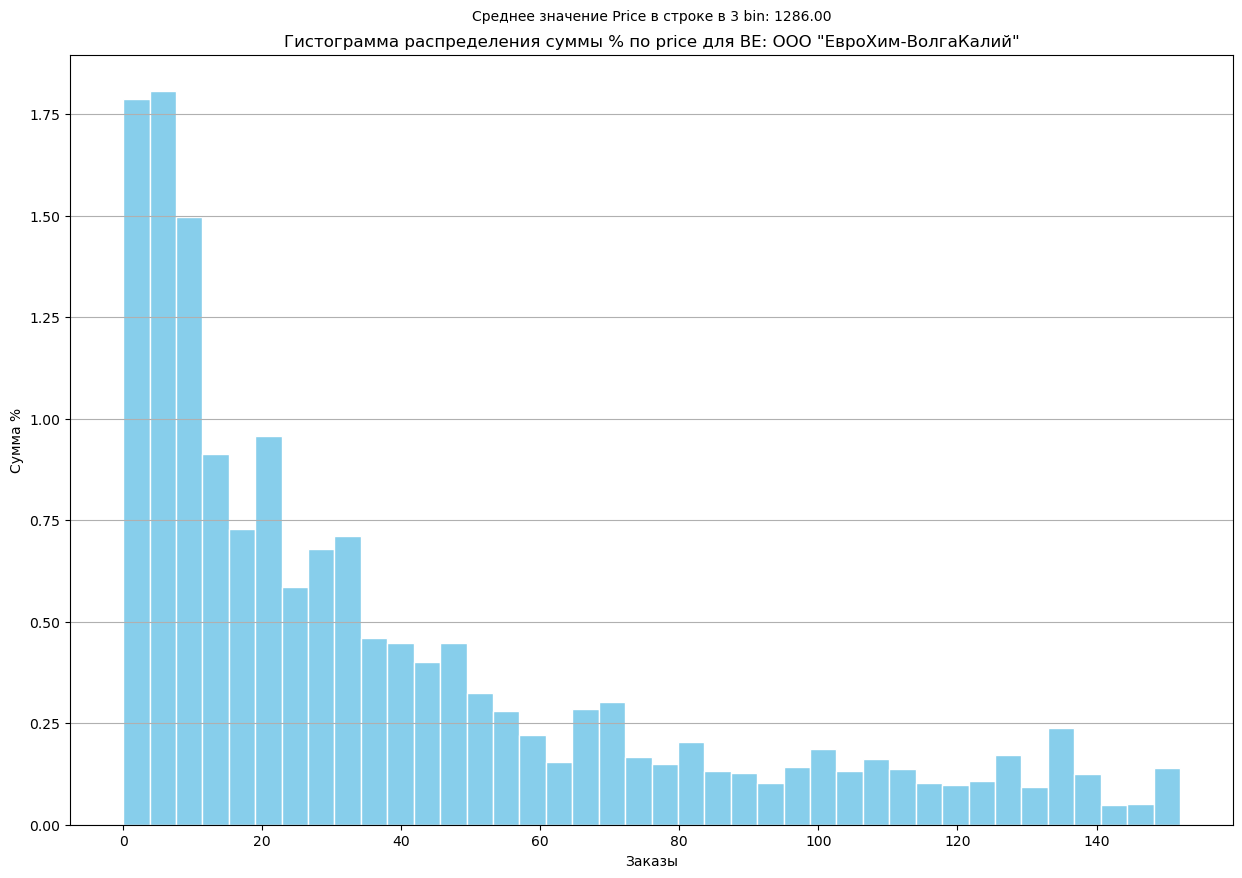

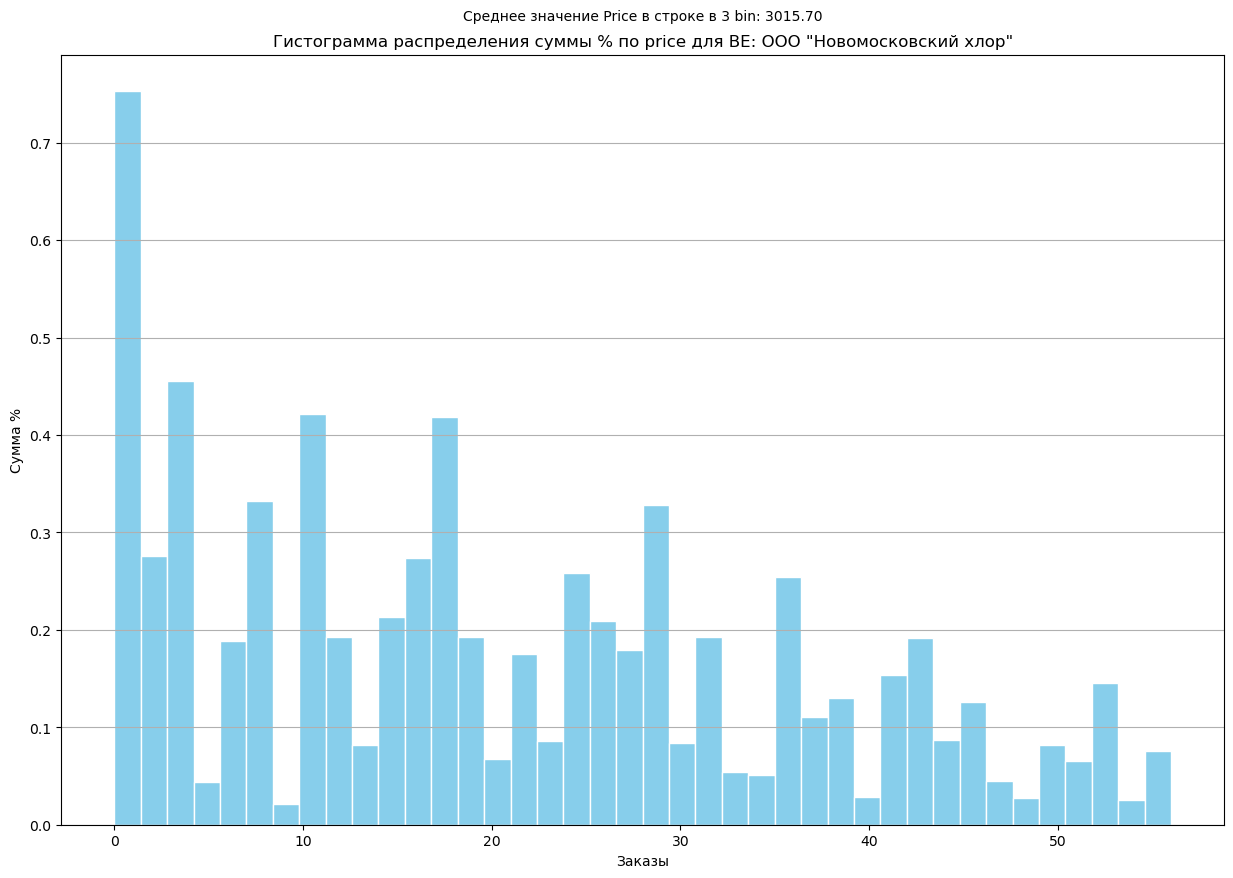

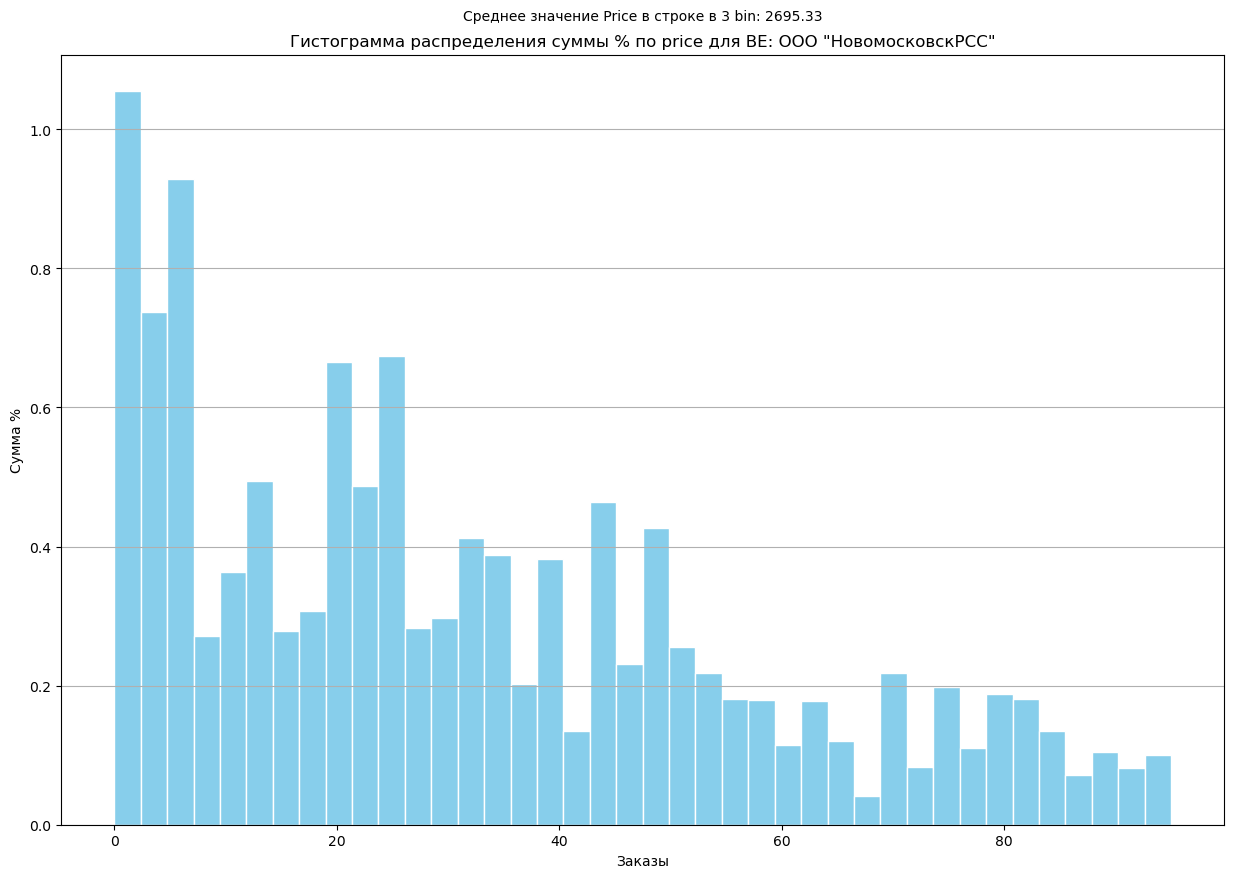

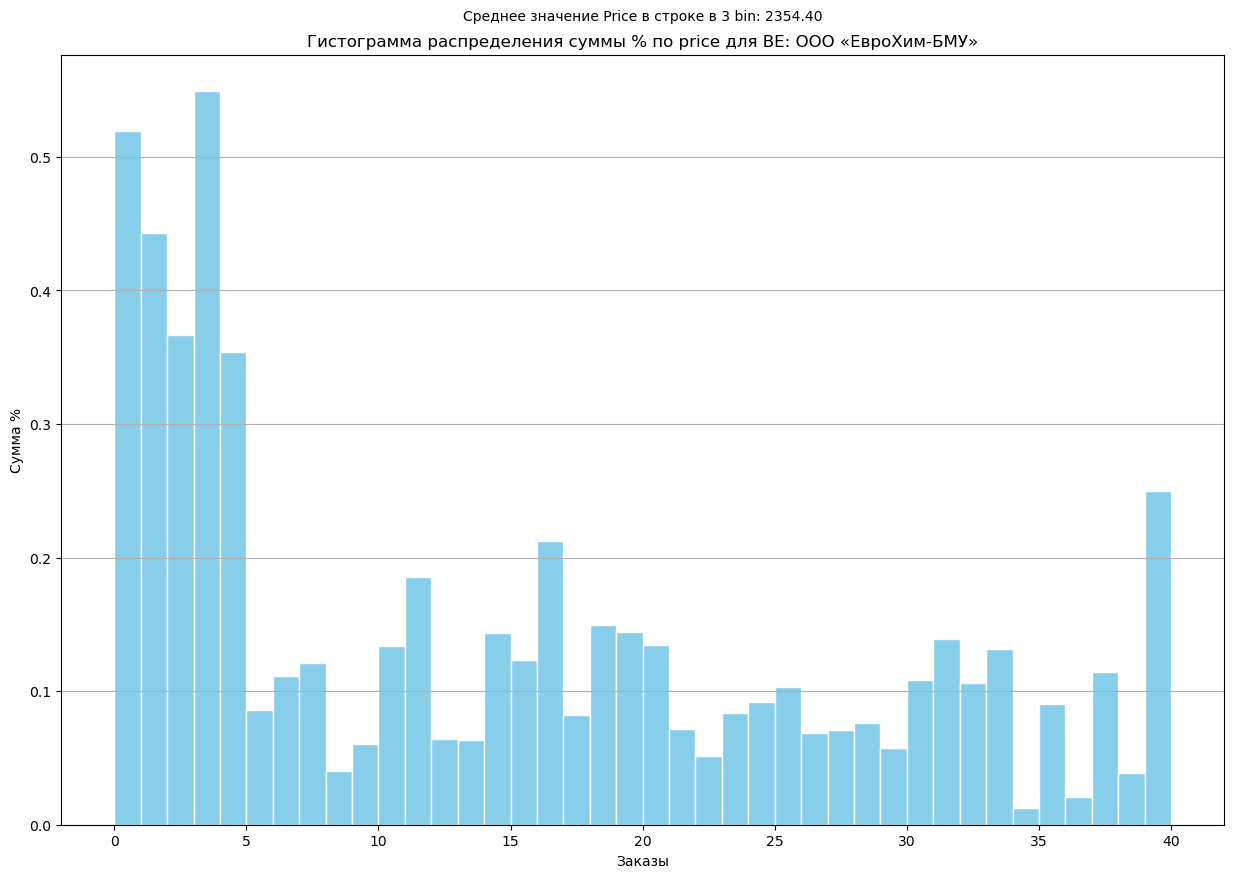

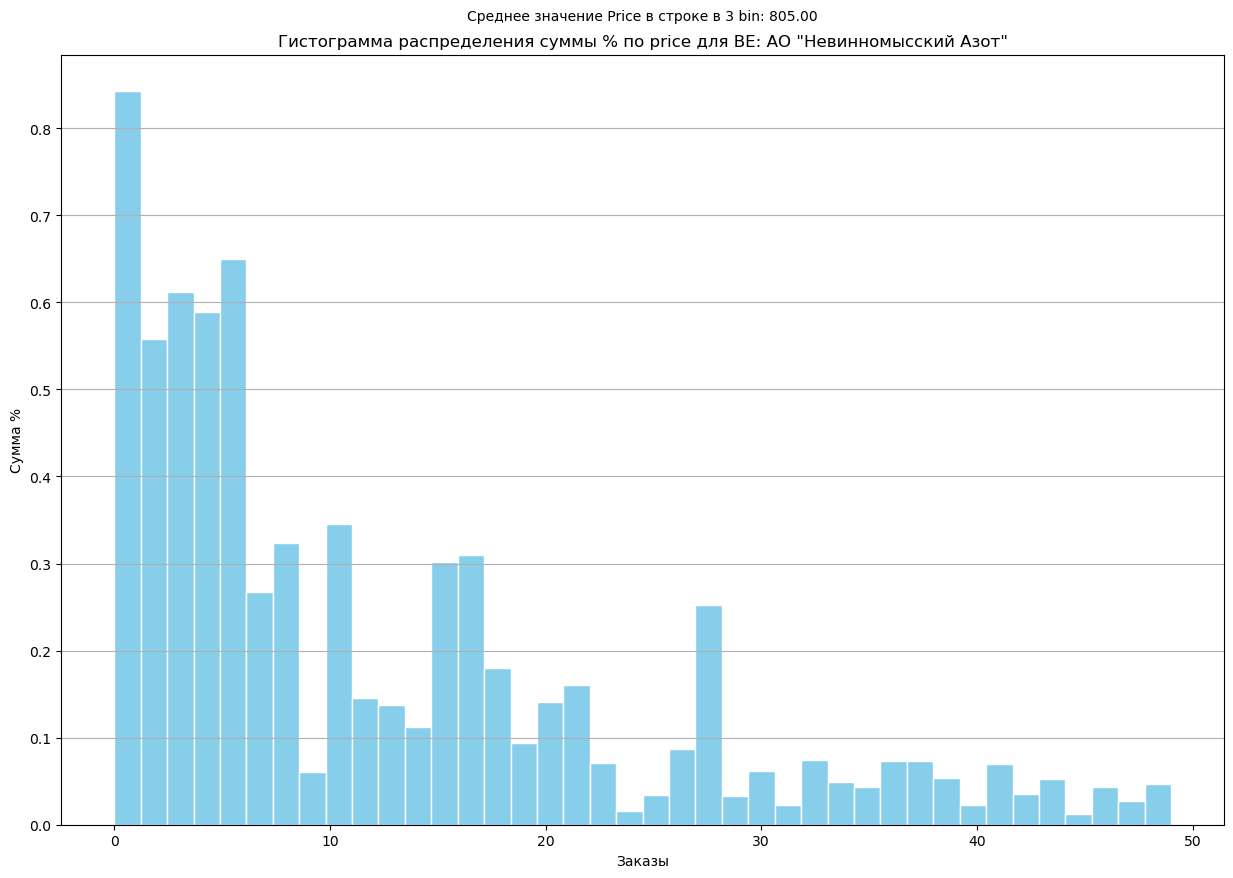

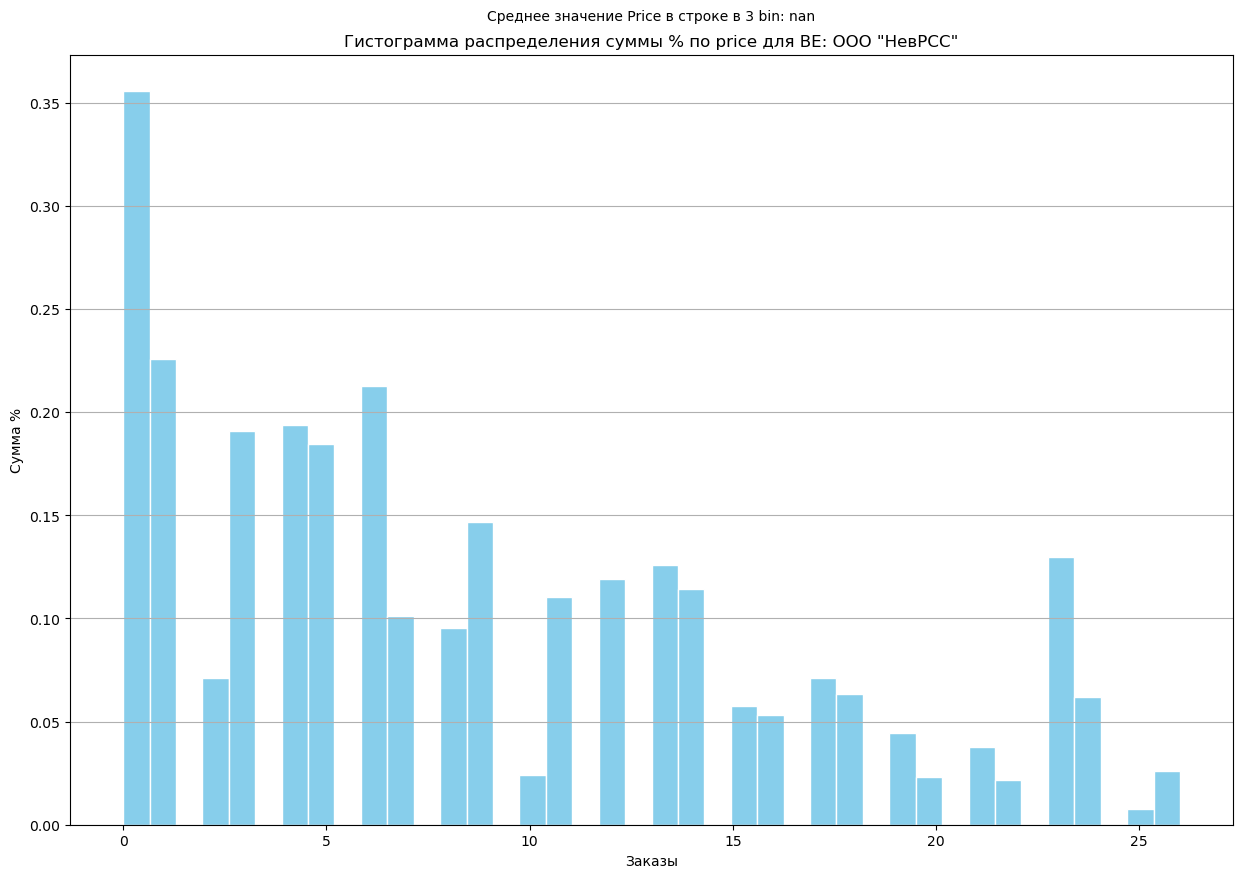

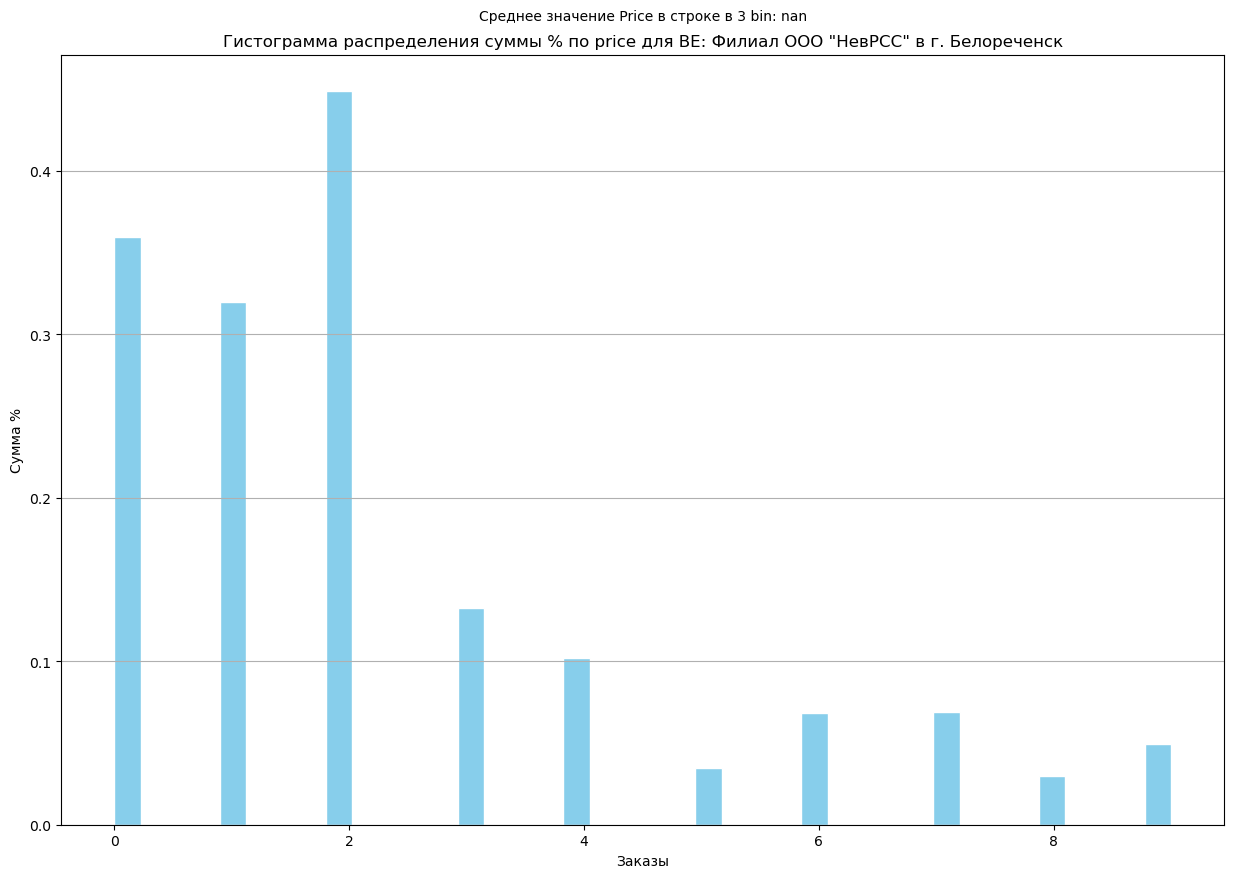

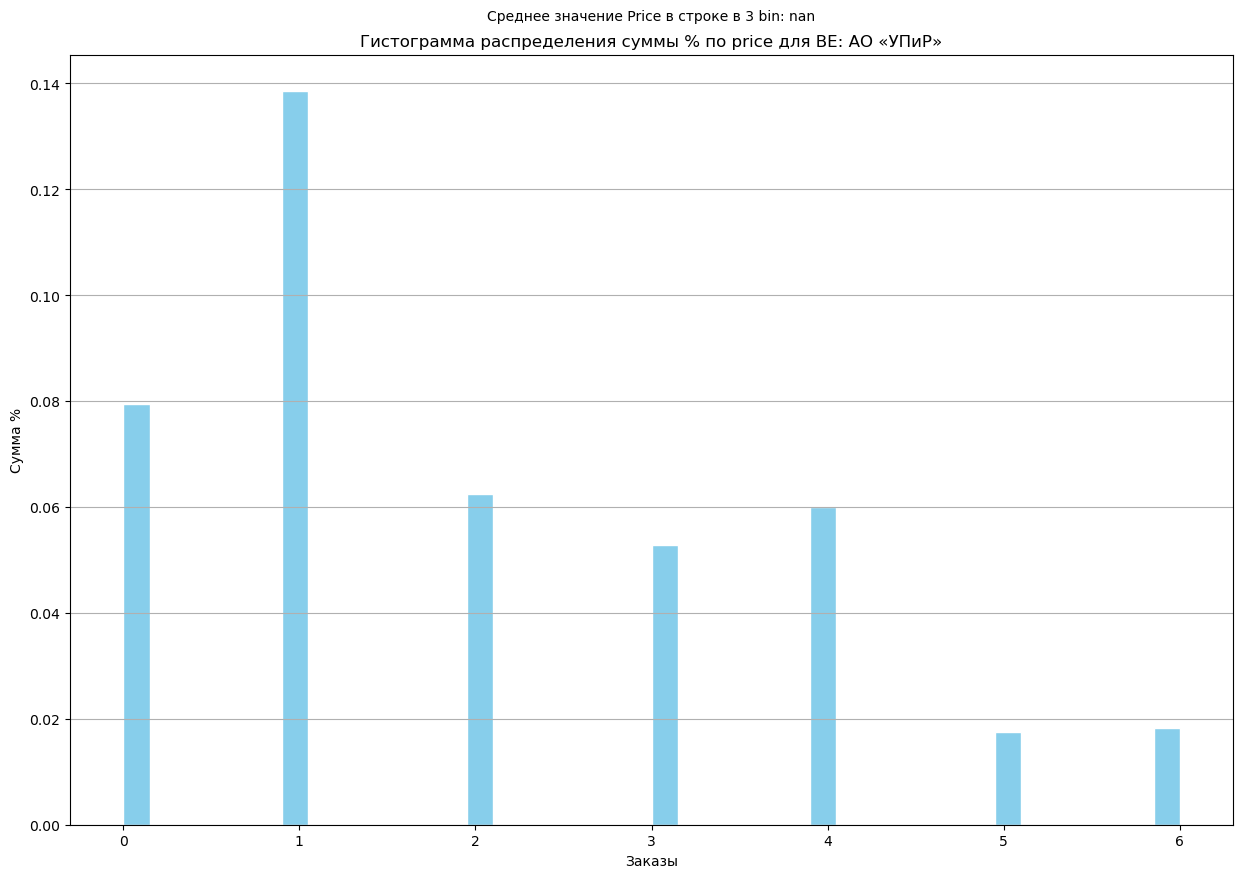

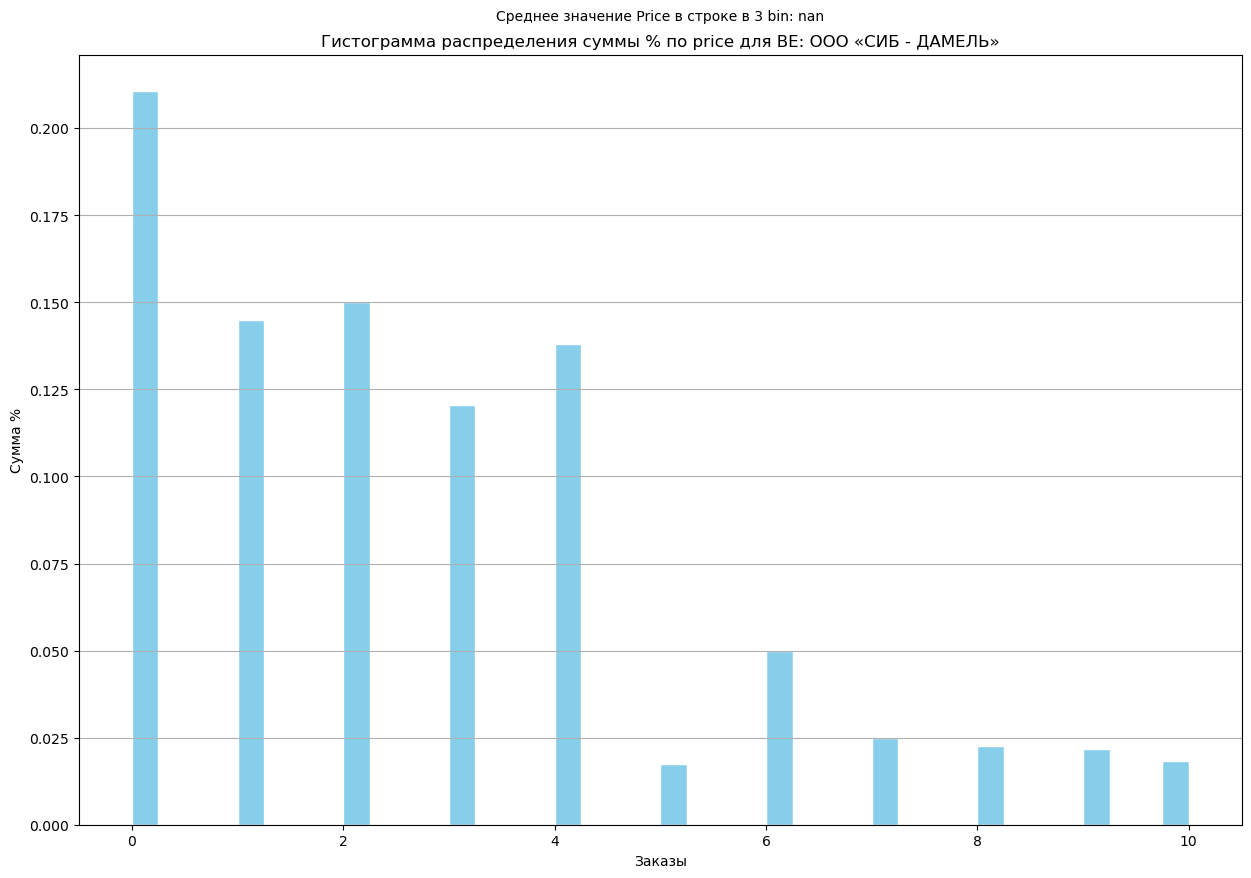

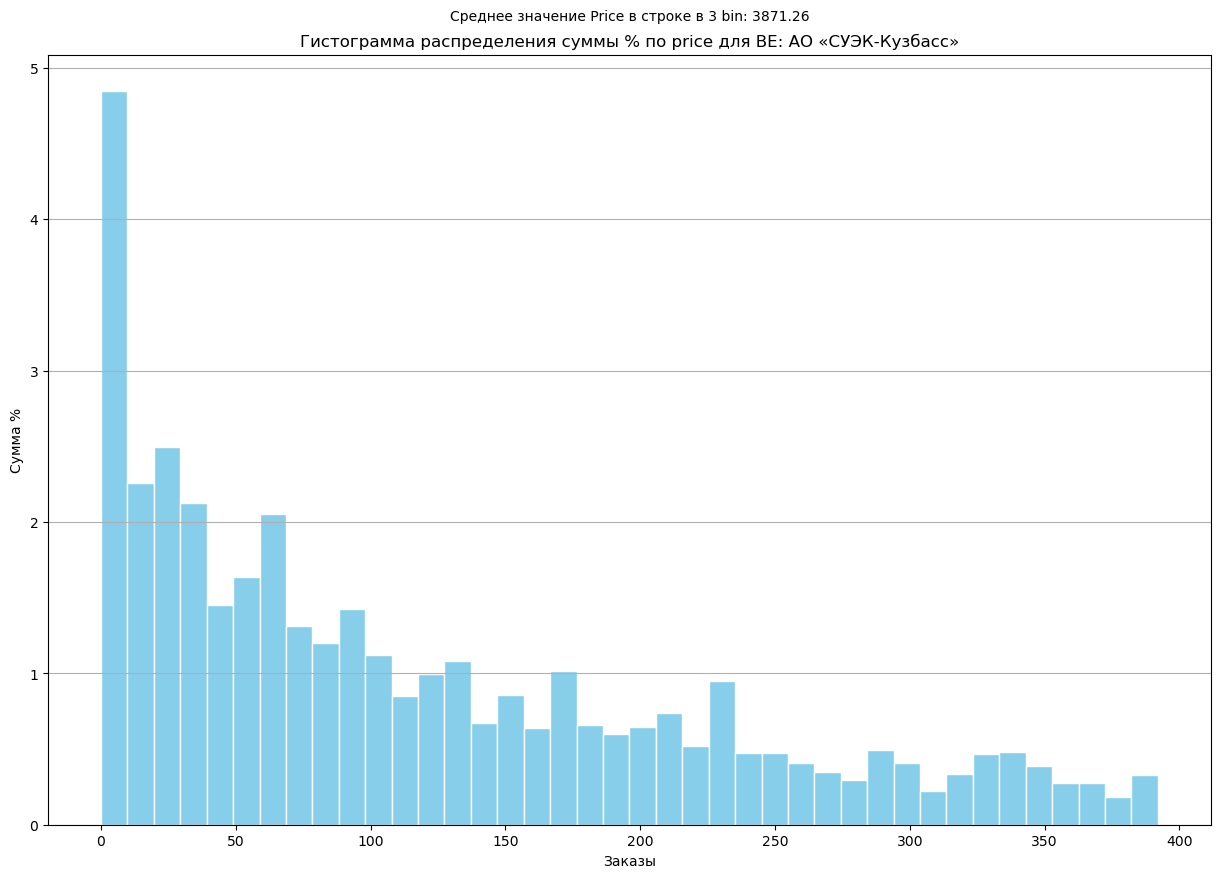

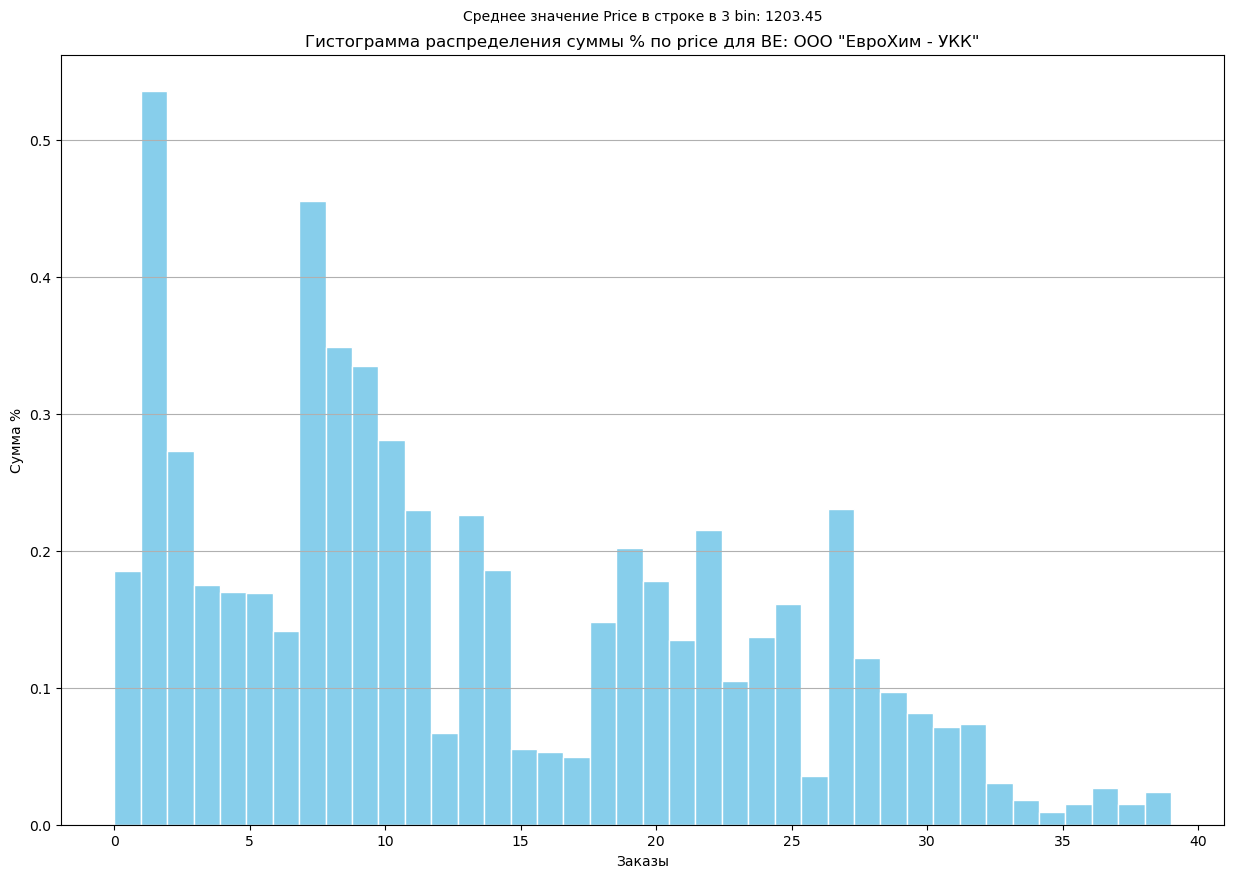

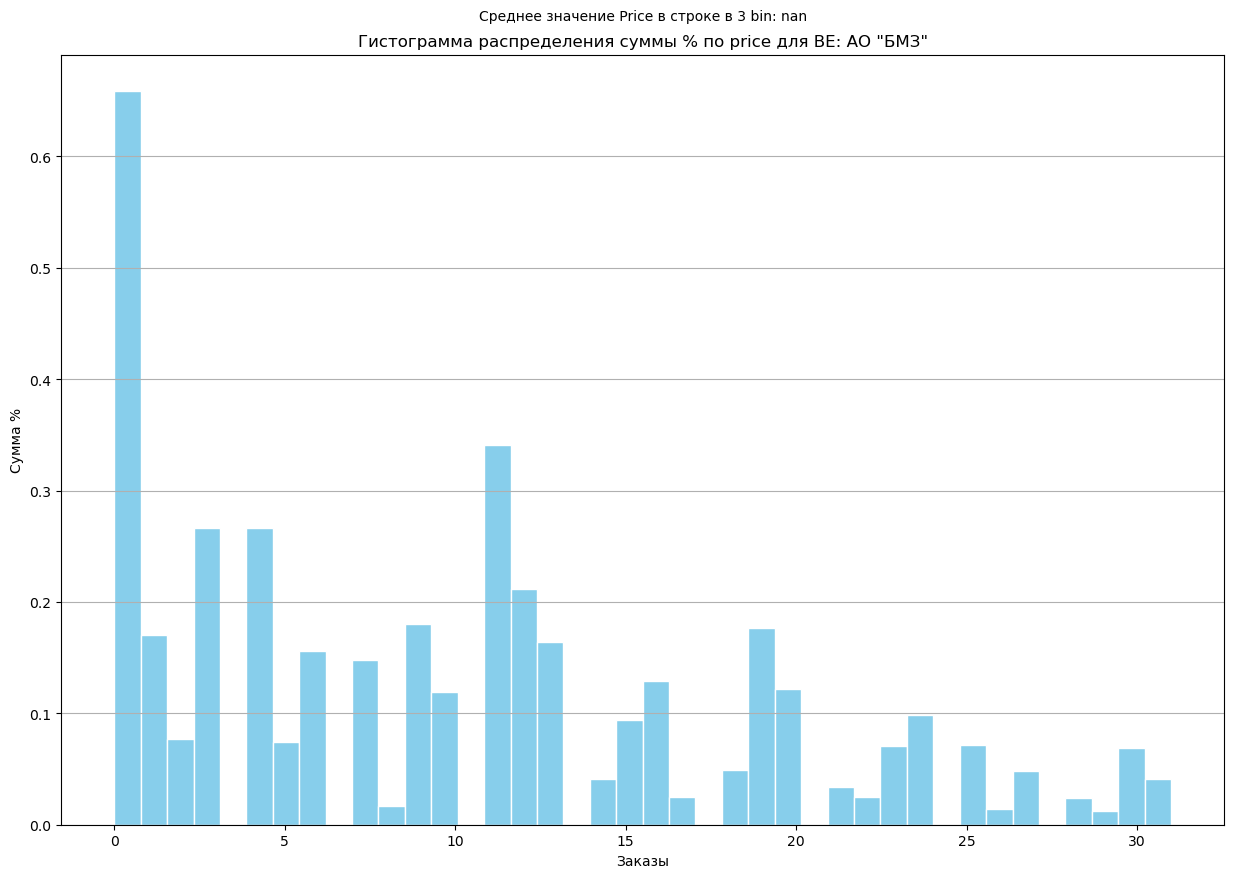

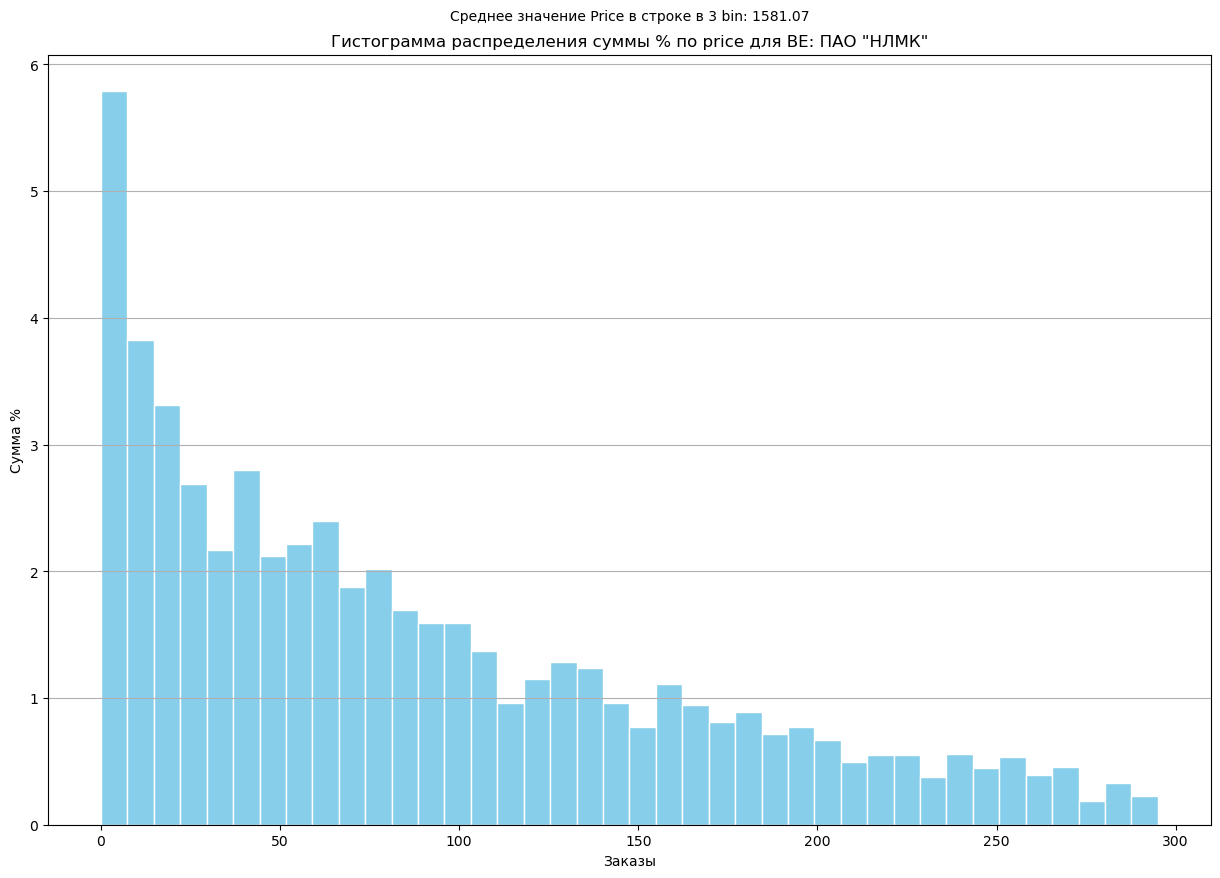

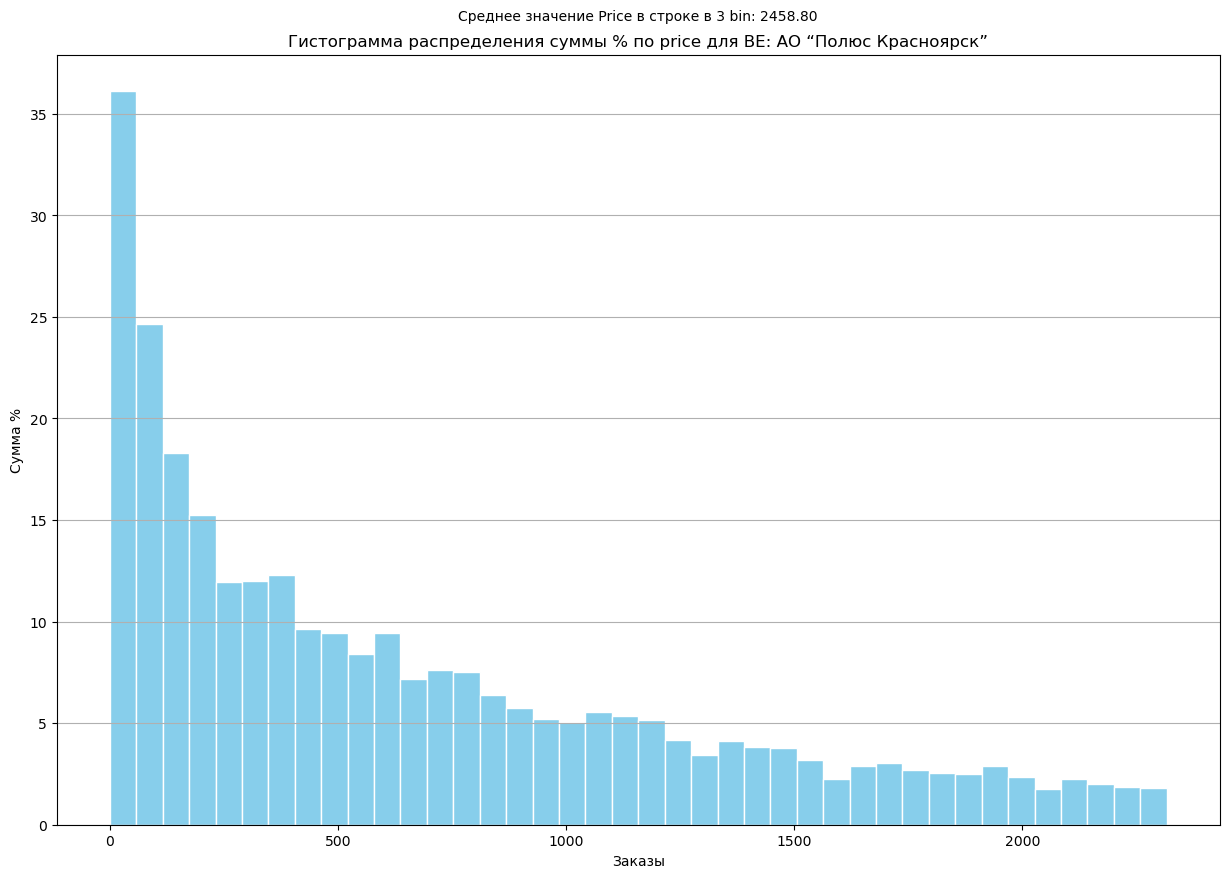

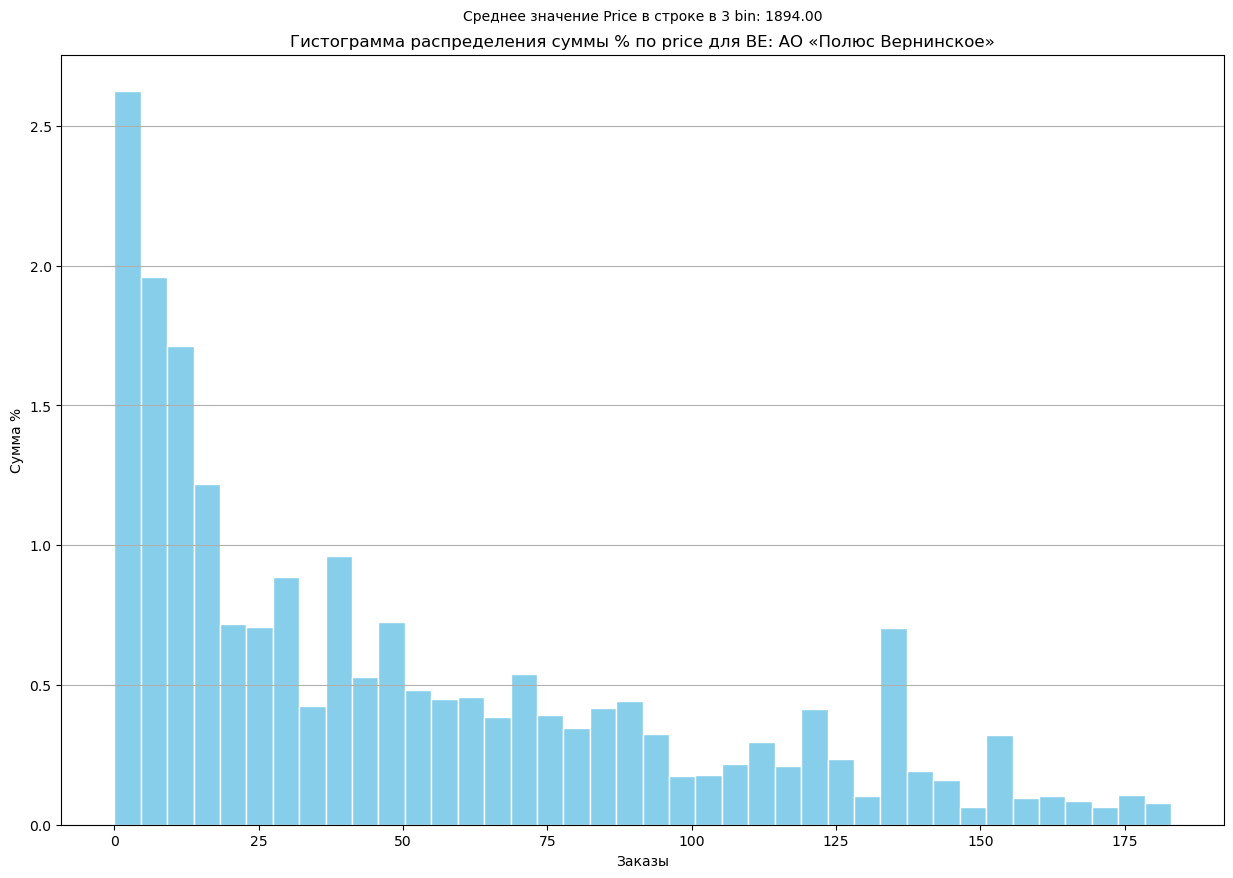

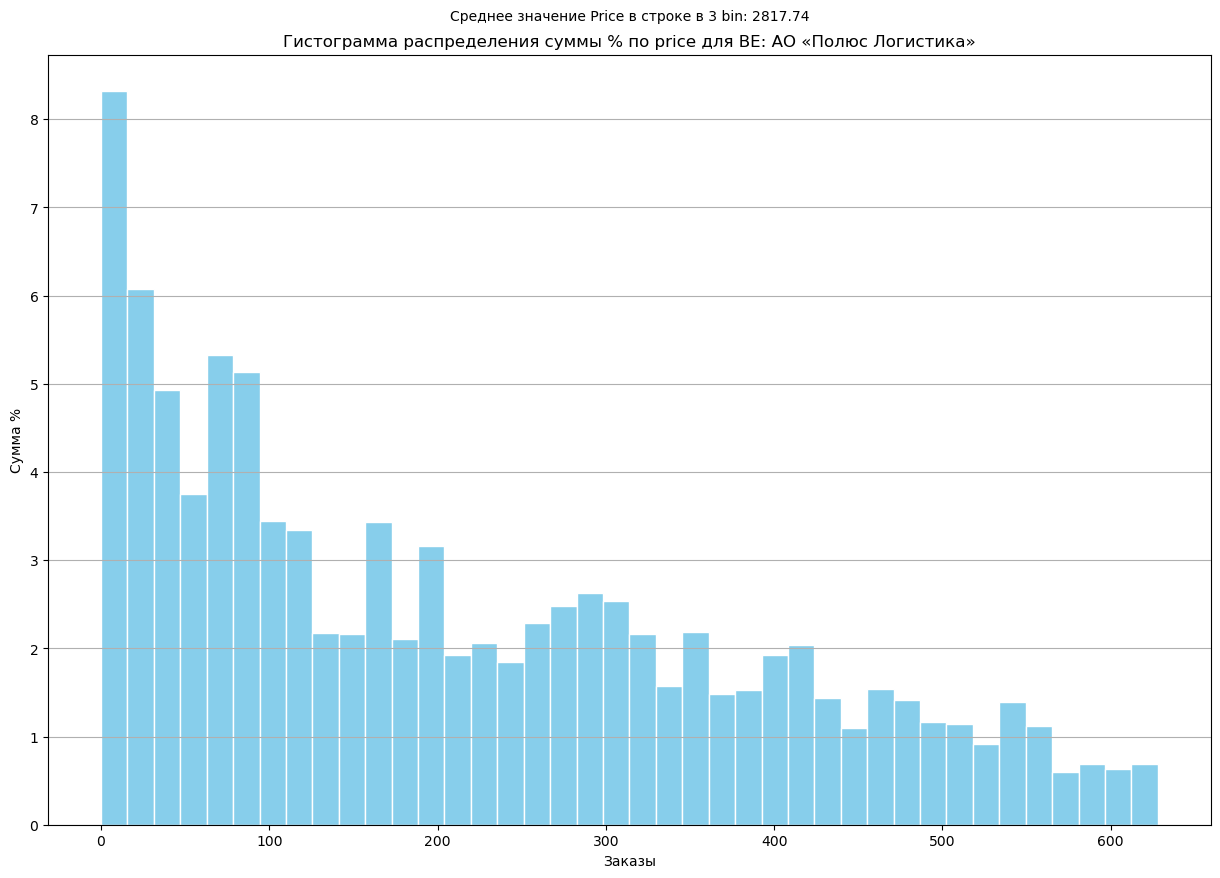

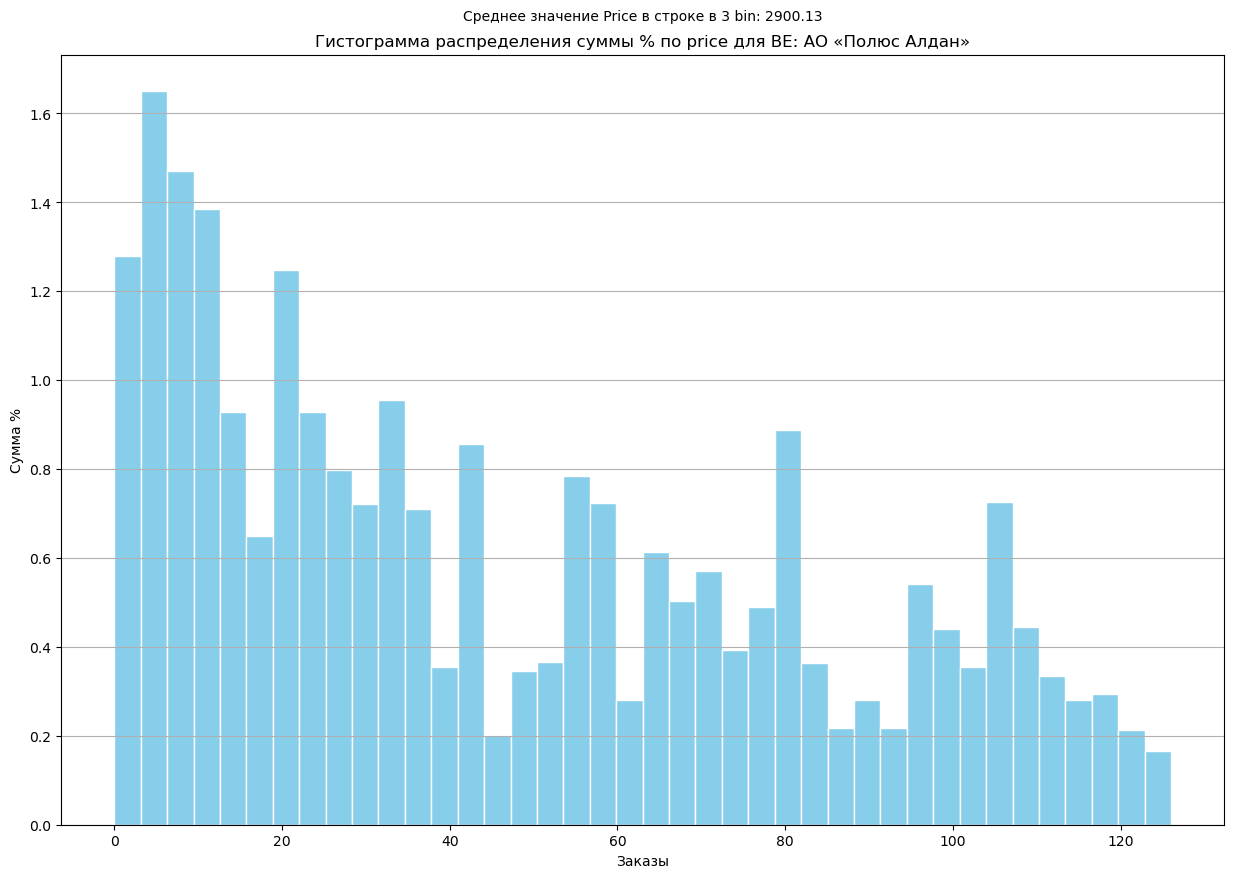

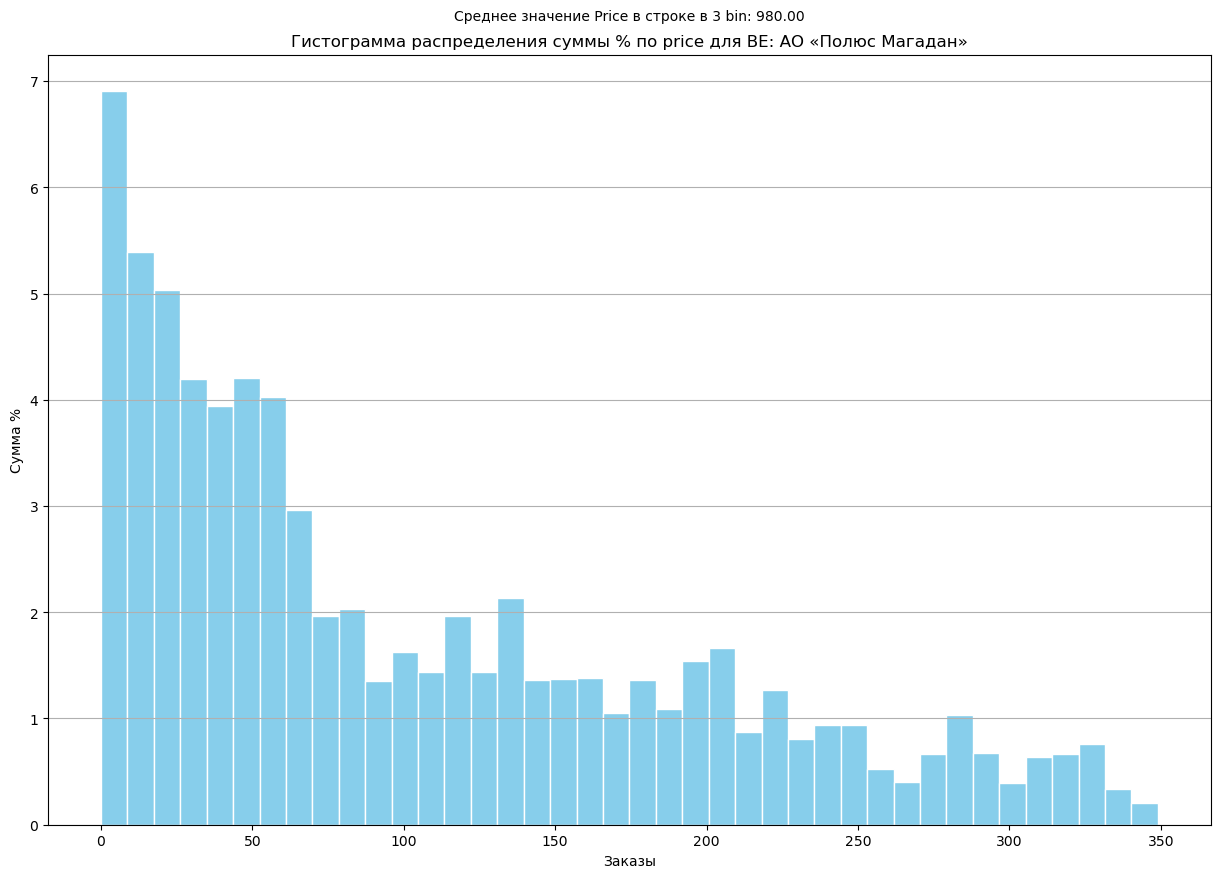

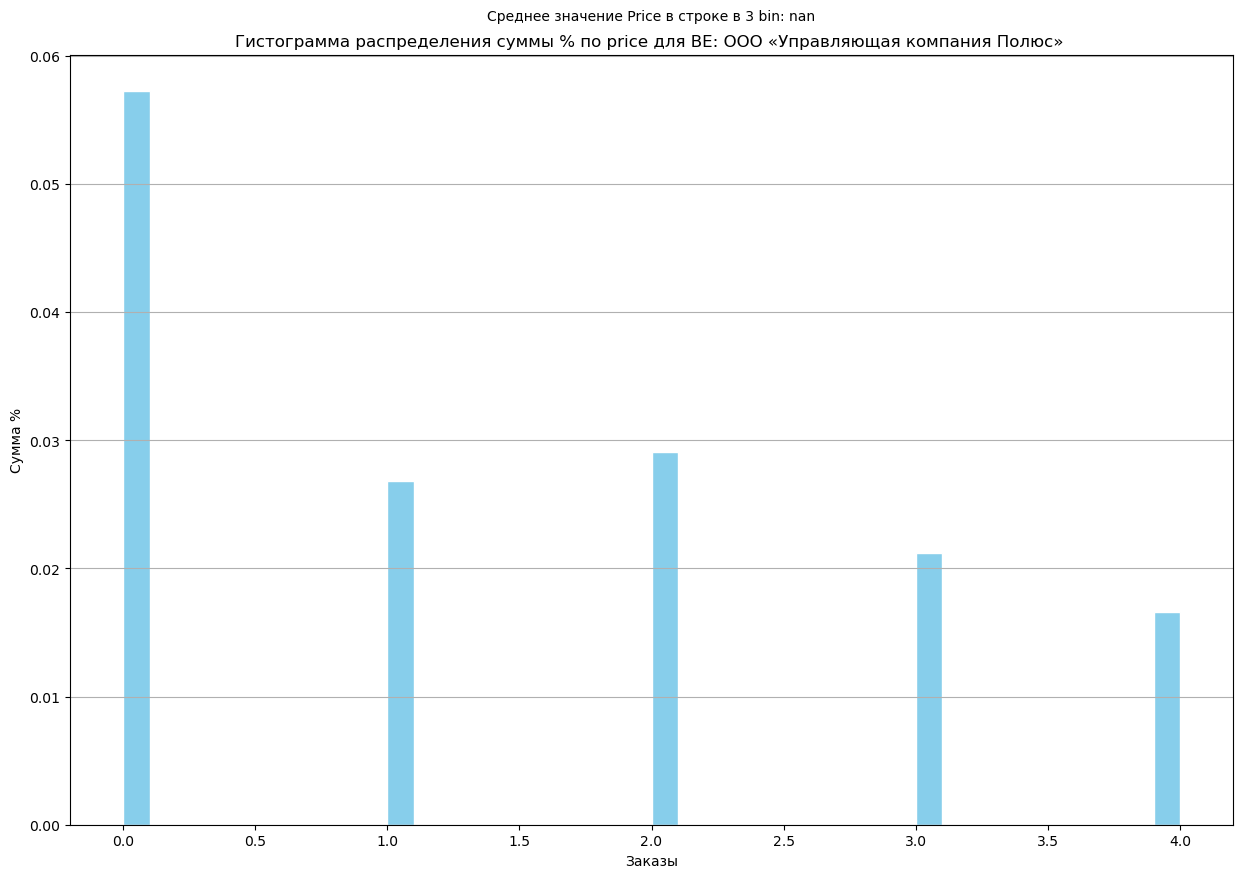

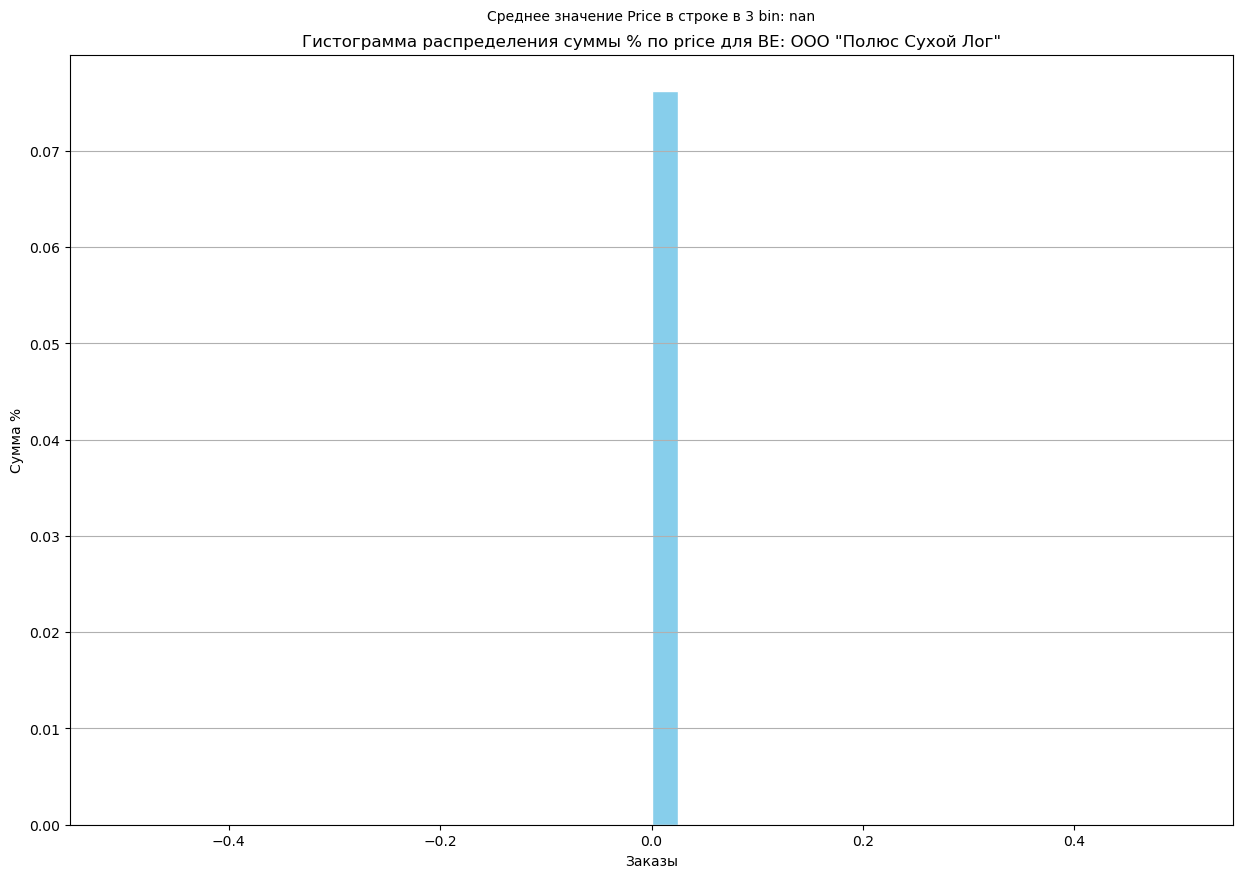

In [121]:
unique_be_values = df_order_delivery['BE'].unique()
bins = 40

for be_value in unique_be_values:
    df_sorted = df_order_delivery[df_order_delivery['BE'] == be_value].sort_values('price', ascending=True).reset_index()
    bin_width = len(df_sorted) // bins

    plt.figure(figsize=(15, 10))
    plt.hist(df_sorted.index, bins=bins, weights=df_sorted['%'], color='skyblue', edgecolor='white')
    plt.title(f'Гистограмма распределения суммы % по price для BE: {be_value}')
    plt.xlabel('Заказы')
    plt.ylabel('Сумма %')
    plt.grid(axis='y')

    third_bin_start_idx = bin_width * z-1
    third_bin_end_idx = bin_width * z if z-1 < bins - 1 else len(df_sorted)
    avg_price_per_third_bin = df_sorted.iloc[third_bin_start_idx:third_bin_end_idx]['price'].mean()
    plt.text(0.5, 1.05, f'Среднее значение Price в строке в {z} bin: {avg_price_per_third_bin:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.show()

Если в графике выше взять за оптимальное отсеять средний процент выше 0.3:

# Выводы: 

## Анализировался процент доставки от общей стоимости (процент):

### Анализ Поставщиков, Каталогов, Наличия - имеет смысл в том случае, если есть возможность управлять минимальной стоимостью ПОДЗАКАЗА

### Поставщики, Каталоги, а также Наличие оказывают влияние на процент, а наиболее "плохие" - выделены в анализе выше

### Переход из разреза подзаказов в заказ сильно сглаживает пропорцию выбросных доставок относительно стоимости самого кванта, уменьшая процент. Выбросы в куда большей степени находятся именно на уровне подзаказа

### Установление минимальной стоимости как подзаказа, так и заказа, в положительную сторону скажется на проценте (уменьшит его).  Для лучшей точности имеет смысл рассматривать минимальную стоимость, как заказа, так и подзаказа, в разрезе БЕ

### Имеет смысл вводить минимальную стоимость заказа только для строк со стоимостью доставки больше нуля, чтобы не ухудшать статистику